# RESUME SCREENER MODEL USING ONEDAAL LIBRARY(INTELEX)

In [72]:

!pip install scikit-learn-intelex

Defaulting to user installation because normal site-packages is not writeable


In [4]:
pip install dpcpp-cpp-rt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install pandas
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## IMPORTING NECESSARY LIBRARIES

In [6]:
import pandas as pd

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import seaborn as sns # visualization
import matplotlib.pyplot as plt
import string
import re

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.feature_selection import chi2
import nltk #importing the natural language toolkit
from nltk.corpus import stopwords

In [17]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 28.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 771.9/771.9 kB 35.7 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from wordcloud import WordCloud

In [35]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [20]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 19.3 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from sklearn.pipeline import Pipeline
from matplotlib.gridspec import GridSpec

## EDA

In [12]:
data = pd.read_csv('UpdatedResumeDataSet.csv')
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [13]:
data['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [14]:
print(data['Category'].value_counts())

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


In [15]:
print(len(data['Category']))

962


<Axes: xlabel='count', ylabel='Category'>

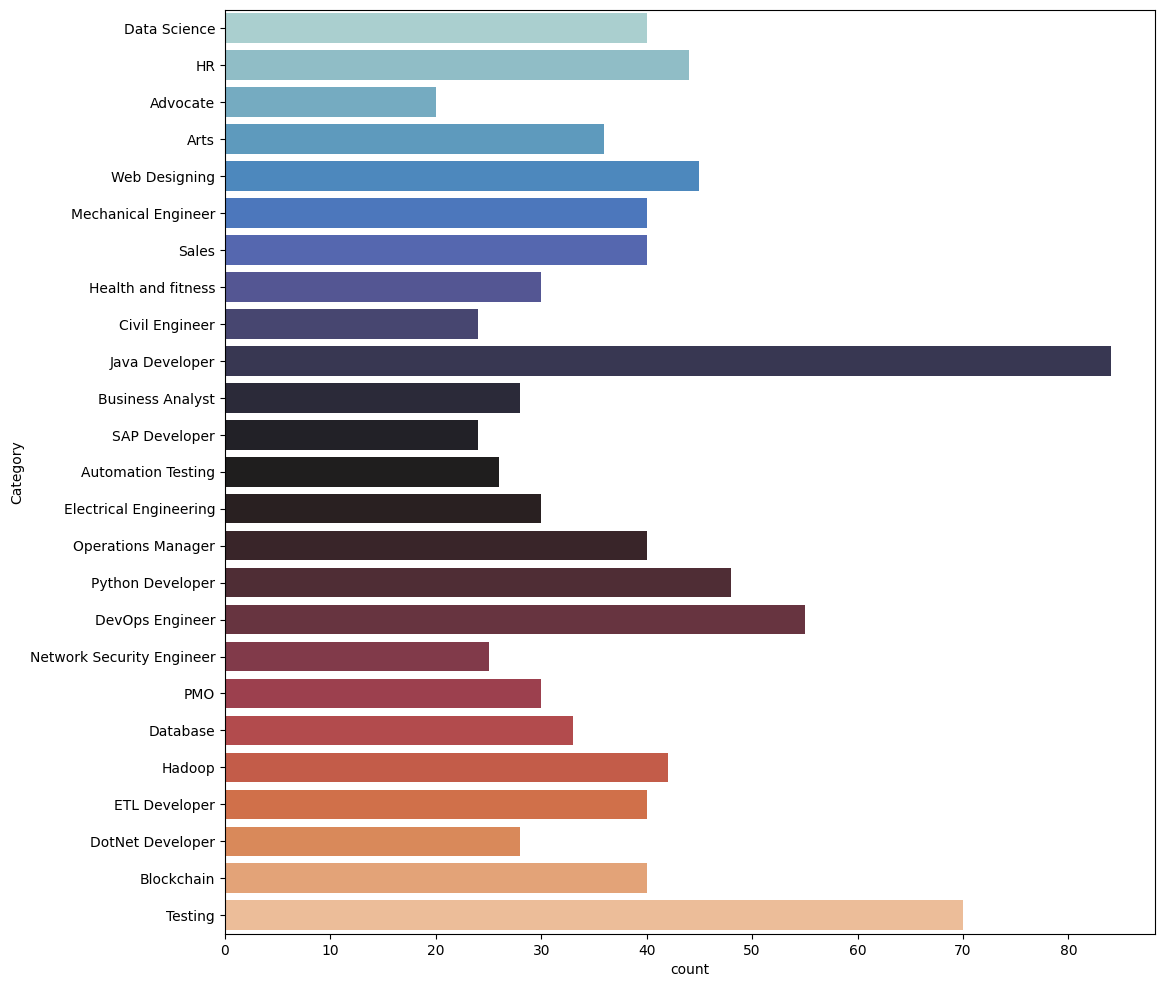

In [16]:
plt.figure(figsize=(12,12))
plt.xticks()
sns.countplot(data=data,y='Category', palette="icefire")

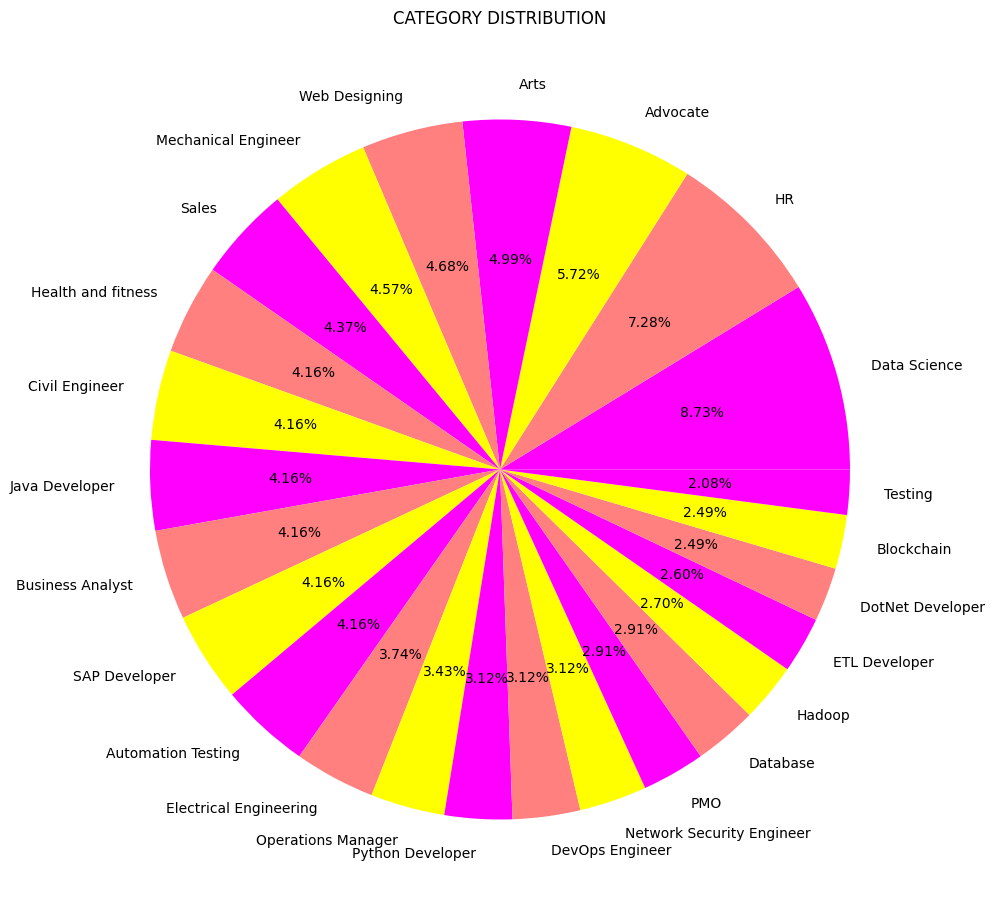

In [17]:
Counts = data['Category'].value_counts()
Labels = data['Category'].unique()

plt.figure(1, figsize=(25,25))
grid = GridSpec(2,2)

cmap = plt.get_cmap('spring')
color = [cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(grid[0,1], aspect = 1, title='CATEGORY DISTRIBUTION')

source_pie =plt.pie(Counts, labels = Labels, autopct = '%1.2f%%', colors = color)
plt.show()

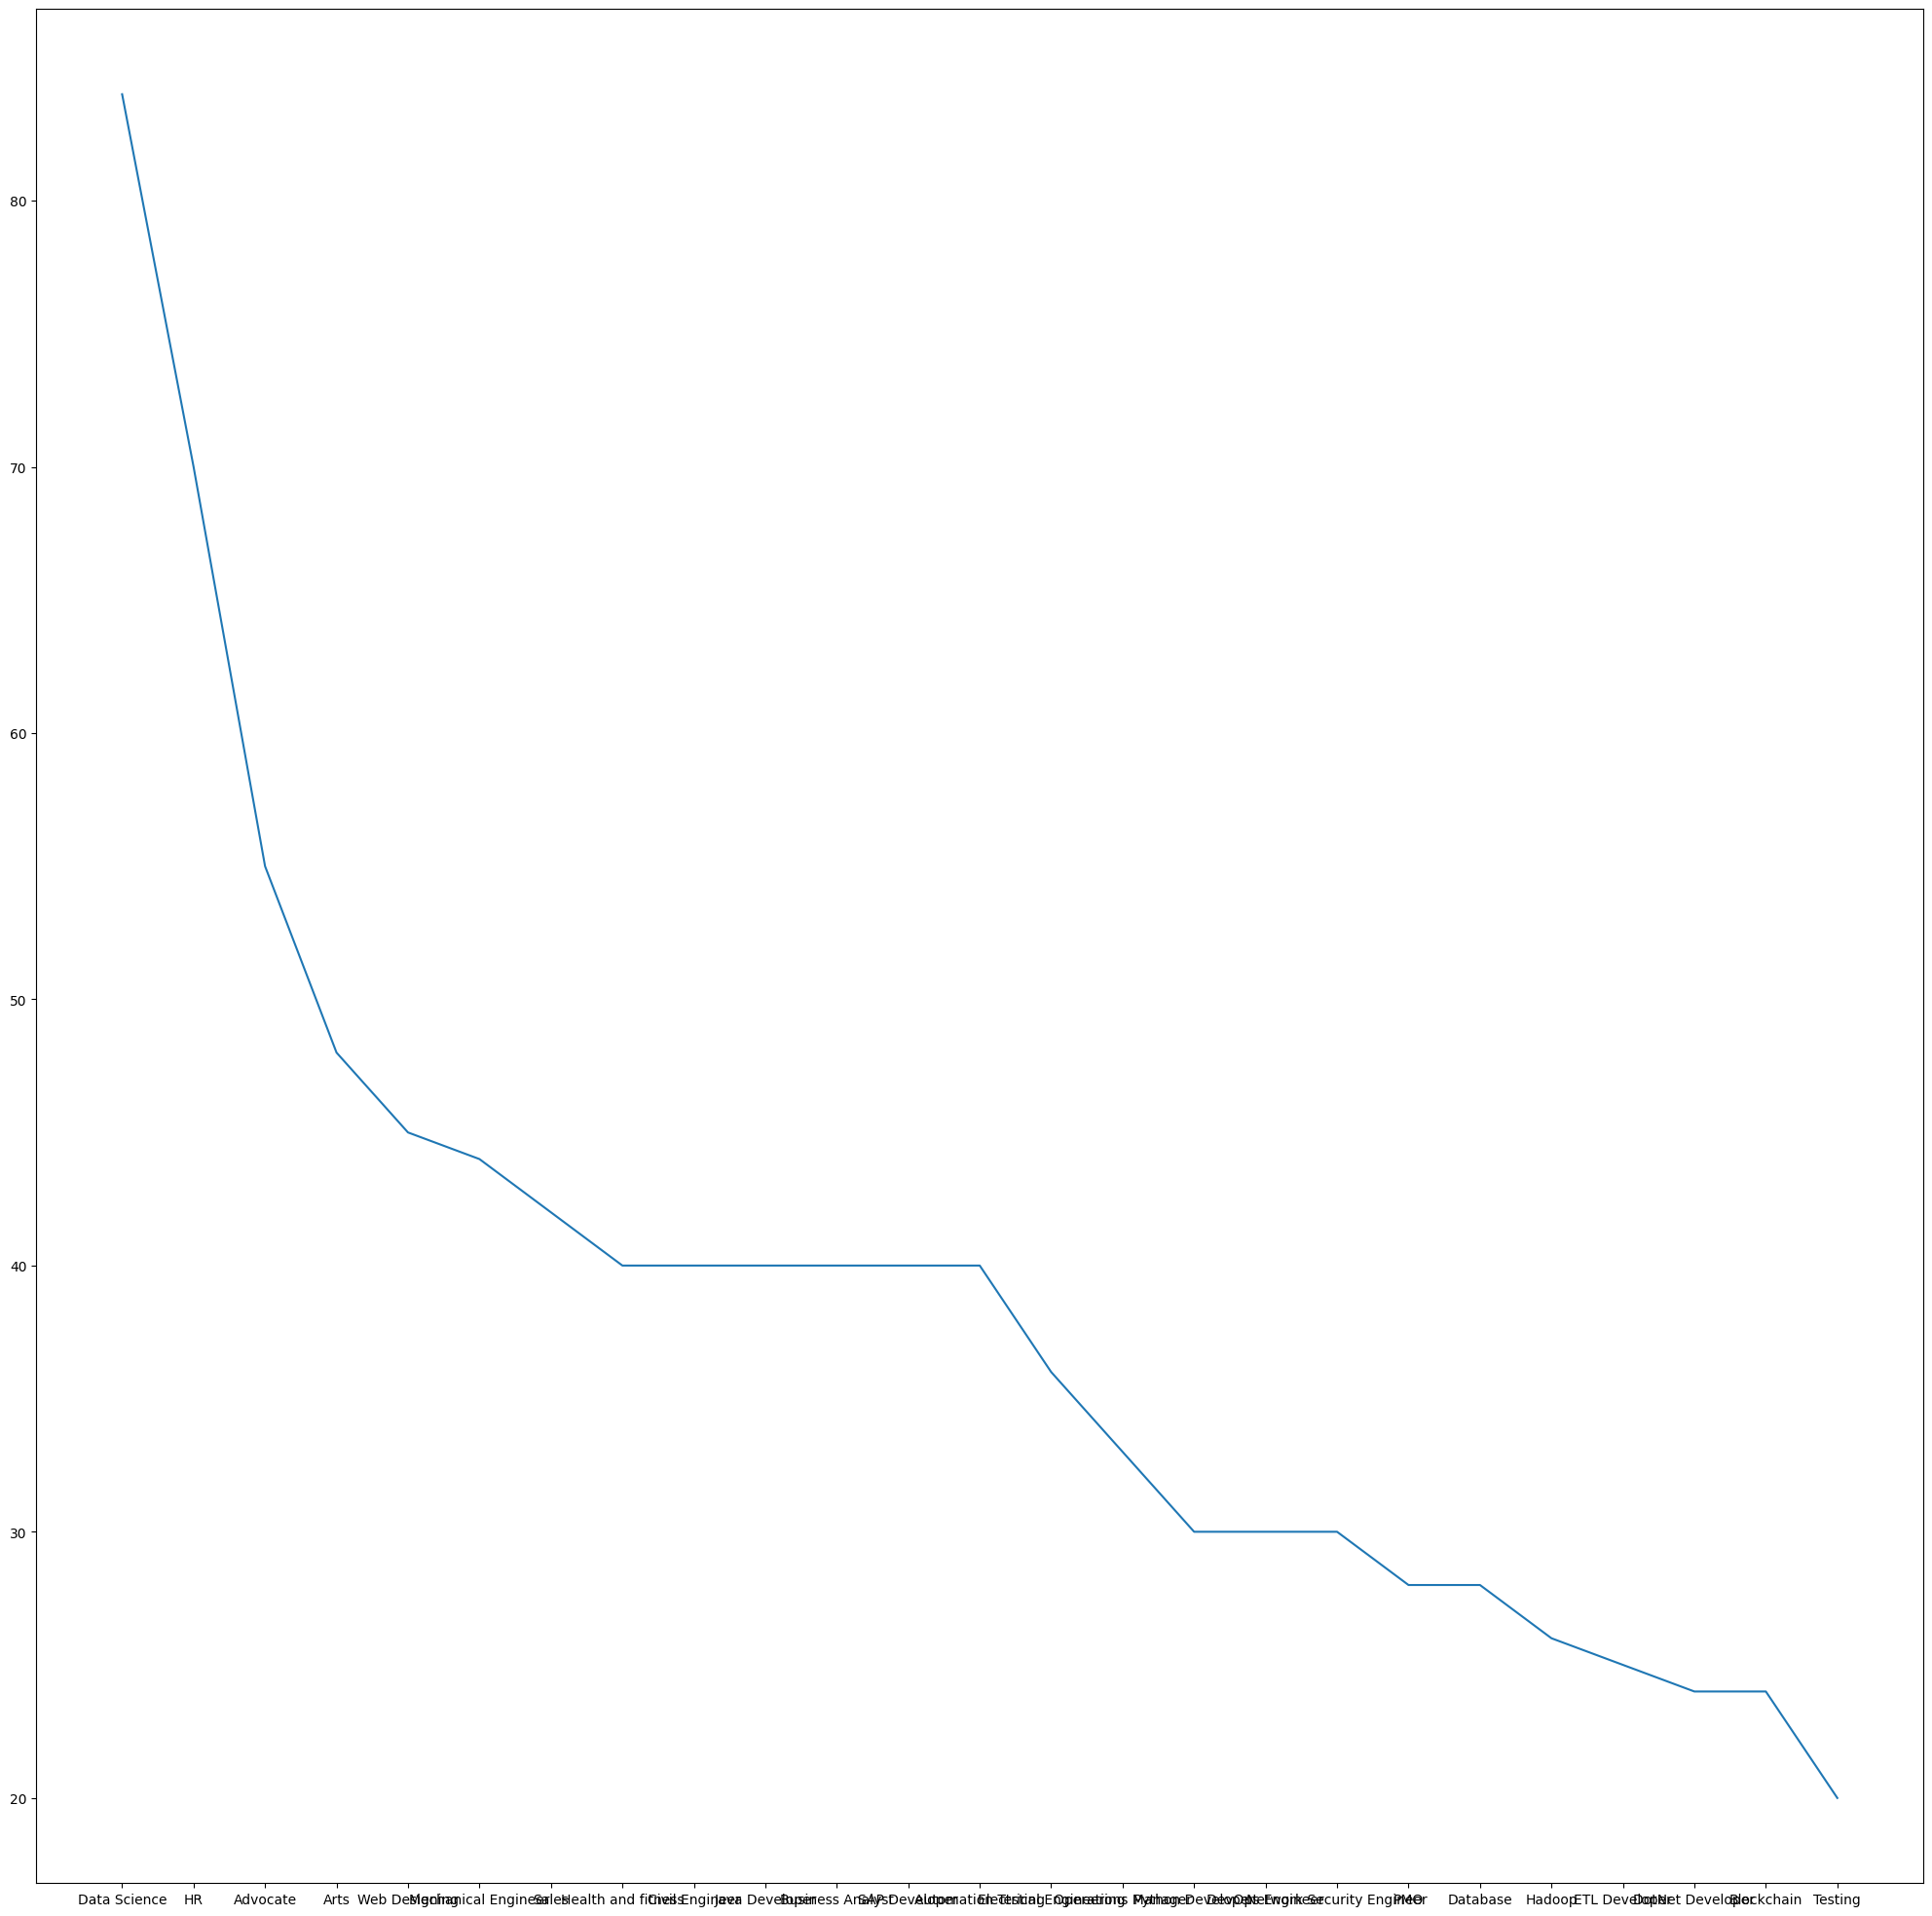

In [18]:
Counts = data['Category'].value_counts()
Labels = data['Category'].unique()

plt.figure(1, figsize=(25,25))

plt.plot(Labels,Counts)

## PREPROCESSING DATA

In [19]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [20]:
def CleanResume(new):
    #col = data['Resume']
    new = new.lower() # Convert the whole column into lowercase.
    new = new.translate(str.maketrans('','',string.punctuation)) #Remove Punctuations from the sentences.
    new = re.sub('http\S+\s*', ' ', new) # remove URLs
    new = re.sub('RT|cc', ' ', new) # remove RT and cc
    new = re.sub(r'[^\x00-\x7f]',r' ', new) 
    new = re.sub('\s+', ' ', new)  # remove extra whitespace
    
    return new

data['Clean_Resume'] = data['Resume'].apply(lambda x: CleanResume(x))

In [21]:
print(data['Clean_Resume'][6])

skills python tableau data visualization r studio machine learning statistics iabac certified data scientist with versatile experience over 1 years in managing business data science consulting and leading innovation projects bringing business ideas to working real world solutions being a strong advocator of augmented era where human capabilities are enhanced by machines fahed is passionate about bringing business concepts in area of machine learning ai robotics etc to real life solutionseducation details january 2017 b tech computer science engineering mohali punjab indo global college of engineering data science consultant data science consultant datamites skill details machine learning exprience 13 months python exprience 24 months solutions exprience 24 months data science exprience 24 months data visualization exprience 24 months tableau exprience 24 monthscompany details company datamites description analyzed and processed complex data sets using advanced querying visualization an

In [22]:
print("Total Number of words in the Cleaned Data is :", data['Clean_Resume'].apply(lambda x: len(x.split(' '))).sum())

Total Number of words in the Cleaned Data is : 401840


In [26]:
s_w = stopwords.words('english')
punctuation = string.punctuation
totalWords = []
cleaned_sentences = ""

for sentence in data['Clean_Resume']:
    words = nltk.word_tokenize(sentence)
    cleaned_sentences += sentence
    for word in words:
        if word not in s_w and word not in punctuation:
            totalWords.append(word)
            
wordDist = nltk.FreqDist(totalWords)
mostCommon = wordDist.most_common(50)
print(mostCommon)

[('exprience', 3829), ('company', 3536), ('project', 3353), ('months', 3283), ('description', 3122), ('details', 3096), ('data', 2129), ('management', 1989), ('team', 1922), ('1', 1875), ('maharashtra', 1449), ('system', 1395), ('6', 1371), ('testing', 1339), ('year', 1332), ('database', 1274), ('business', 1195), ('development', 1187), ('less', 1145), ('test', 1140), ('ltd', 1128), ('using', 1124), ('skill', 1101), ('january', 1090), ('engineering', 1055), ('application', 1035), ('developer', 1033), ('pune', 1025), ('java', 1015), ('client', 1015), ('work', 987), ('sql', 957), ('services', 951), ('skills', 950), ('software', 871), ('responsibilities', 856), ('pvt', 831), ('reports', 814), ('sales', 801), ('process', 792), ('requirements', 790), ('technologies', 764), ('operations', 761), ('technical', 755), ('customer', 752), ('university', 751), ('server', 751), ('india', 750), ('monthscompany', 746), ('working', 745)]


In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/u131083/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

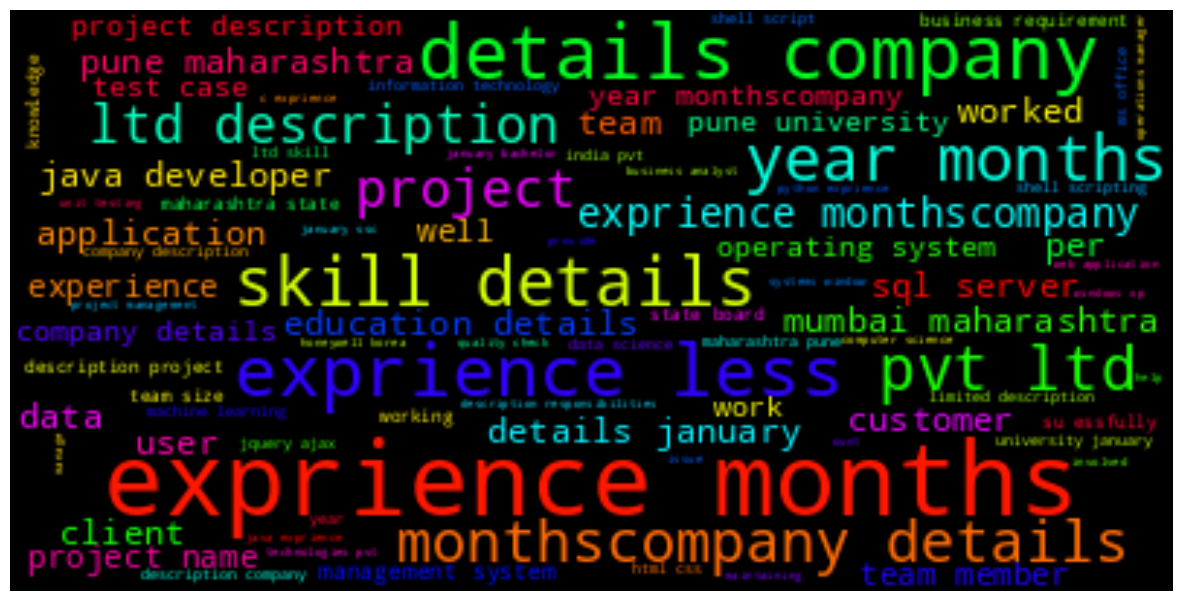

In [27]:
w_c = WordCloud(colormap='hsv_r').generate(cleaned_sentences)
plt.figure(figsize=(15,15))
plt.imshow(w_c, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
le = LabelEncoder()
#le.fit(data['Category'])
data['Category_Index'] = le.fit_transform(data['Category'])

In [29]:
data.sample(5)

,Category,Resume,Clean_Resume,word_count,Category_Index
714,Database,"TECHNICAL SKILL: Operating System LINUX, Windo...",technical skill operating system linux windows...,480,7
294,Health and fitness,Education Details \r\nMay 2014 Diploma Nutriti...,education details may 2014 diploma nutrition e...,372,14
469,Automation Testing,SOCIAL SKILLS: â¢ Ability to establish trust ...,social skills ability to establish trust and w...,591,2
694,PMO,CORE COMPETENCIES â¢ Maintain processes to en...,core competencies maintain processes to ensure...,699,19
36,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,skills python tableau data visualization r stu...,212,6


In [30]:
category_unique = data[['Category', 'Category_Index']].drop_duplicates()

In [31]:
category_to_index = dict(category_unique.values)
index_to_category = dict(category_unique[['Category_Index', 'Category']].values)

In [32]:
text = data['Clean_Resume'].values.tolist()
new_text = np.array(text)
target = data['Category_Index'].values

vect = TfidfVectorizer(sublinear_tf = True, min_df=5, ngram_range=(1, 2), stop_words = 'english', max_features = 1500)
WordFeatures = vect.fit_transform(text)

x_train, x_test, y_train, y_test = train_test_split(WordFeatures, target, random_state=0, test_size = 0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(769, 1500)
(193, 1500)
(769,)
(193,)


In [33]:
N = 2
for Category, Category_Index in sorted(category_to_index.items()):
  features_chi2 = chi2(WordFeatures, target == Category_Index)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(vect.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("==> %s:" %(Category))
  print("    Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("    Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))

==> Advocate:
    Most Correlated Unigrams are: law, legal
    Most Correlated Bigrams are: mumbai university, maharashtra board
==> Arts:
    Most Correlated Unigrams are: drawing, arts
    Most Correlated Bigrams are: days workshop, british council
==> Automation Testing:
    Most Correlated Unigrams are: selenium, qtp
    Most Correlated Bigrams are: test case, automation testing
==> Blockchain:
    Most Correlated Unigrams are: ethereum, blockchain
    Most Correlated Bigrams are: nashik maharashtra, january 2014
==> Business Analyst:
    Most Correlated Unigrams are: cash, analyst
    Most Correlated Bigrams are: company capgemini, business analyst
==> Civil Engineer:
    Most Correlated Unigrams are: construction, civil
    Most Correlated Bigrams are: description role, civil engineer
==> Data Science:
    Most Correlated Unigrams are: nlp, deep
    Most Correlated Bigrams are: machine learning, data science
==> Database:
    Most Correlated Unigrams are: recovery, rman
    Most 

# PRELIMINARY MODEL EVALUATION FOR DIFFERENT TYPES OF MODELS USING DEFAULT PARAMETERS

## Multi-Class Classification models


The classification models evaluated are:

K Nearest Neighbor
Dummy Classifier
Linear Support Vector Classifier
Stochastic Gradient Descent
Random Forest
Decision Tree
AdaBoost
Gradient Boost
Multinomial Naive Bayes Classifier
ve Bayes Classifier

In [75]:
model_dict = {'K Nearest Neighbor': KNeighborsClassifier(),
              'Dummy' : DummyClassifier(random_state=3),
              'Linear Support Vector' : LinearSVC(),
              'Stochastic Gradient Descent' : SGDClassifier(random_state=3, loss='log_loss'),
              'Random Forest': RandomForestClassifier(random_state=3),
              'Decision Tree': DecisionTreeClassifier(random_state=3),
              'AdaBoost': AdaBoostClassifier(random_state=3),
              'Multinomial Naive Bayes' : MultinomialNB(),
              'GradientBoost' : GradientBoostingClassifier()}

#Train test split with stratified sampling for evaluation

#Function to get the accuracy/scores for each model
def model_score_data(model_dict):   
    model_name, ac_score_list, p_score_list, r_score_list, f1_score_list = [], [], [], [], []
    for k,v in model_dict.items():   
        model_name.append(k)
        v.fit(x_train, y_train)
        y_pred = v.predict(x_test)
        ac_score_list.append(accuracy_score(y_test, y_pred))
        p_score_list.append(precision_score(y_test, y_pred, average='macro'))
        r_score_list.append(recall_score(y_test, y_pred, average='macro'))
        f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
        model_comparison_data = pd.DataFrame([model_name, ac_score_list, p_score_list, r_score_list, f1_score_list]).T
        model_comparison_data.columns = ['model_name', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score']
        model_comparison_data = model_comparison_data.sort_values(by='f1_score', ascending=False)
    return model_comparison_data

print(model_score_data(model_dict))

                    model_name accuracy_score precision_score recall_score  \
2        Linear Support Vector            1.0             1.0          1.0   
3  Stochastic Gradient Descent            1.0             1.0          1.0   
4                Random Forest            1.0             1.0          1.0   
5                Decision Tree            1.0             1.0          1.0   
8                GradientBoost            1.0             1.0          1.0   
0           K Nearest Neighbor       0.979275        0.983013     0.976935   
7      Multinomial Naive Bayes       0.963731        0.974773     0.952491   
6                     AdaBoost       0.176166        0.043448         0.08   
1                        Dummy       0.098446        0.003938         0.04   

   f1_score  
2       1.0  
3       1.0  
4       1.0  
5       1.0  
8       1.0  
0  0.977802  
7  0.959063  
6  0.046349  
1   0.00717  


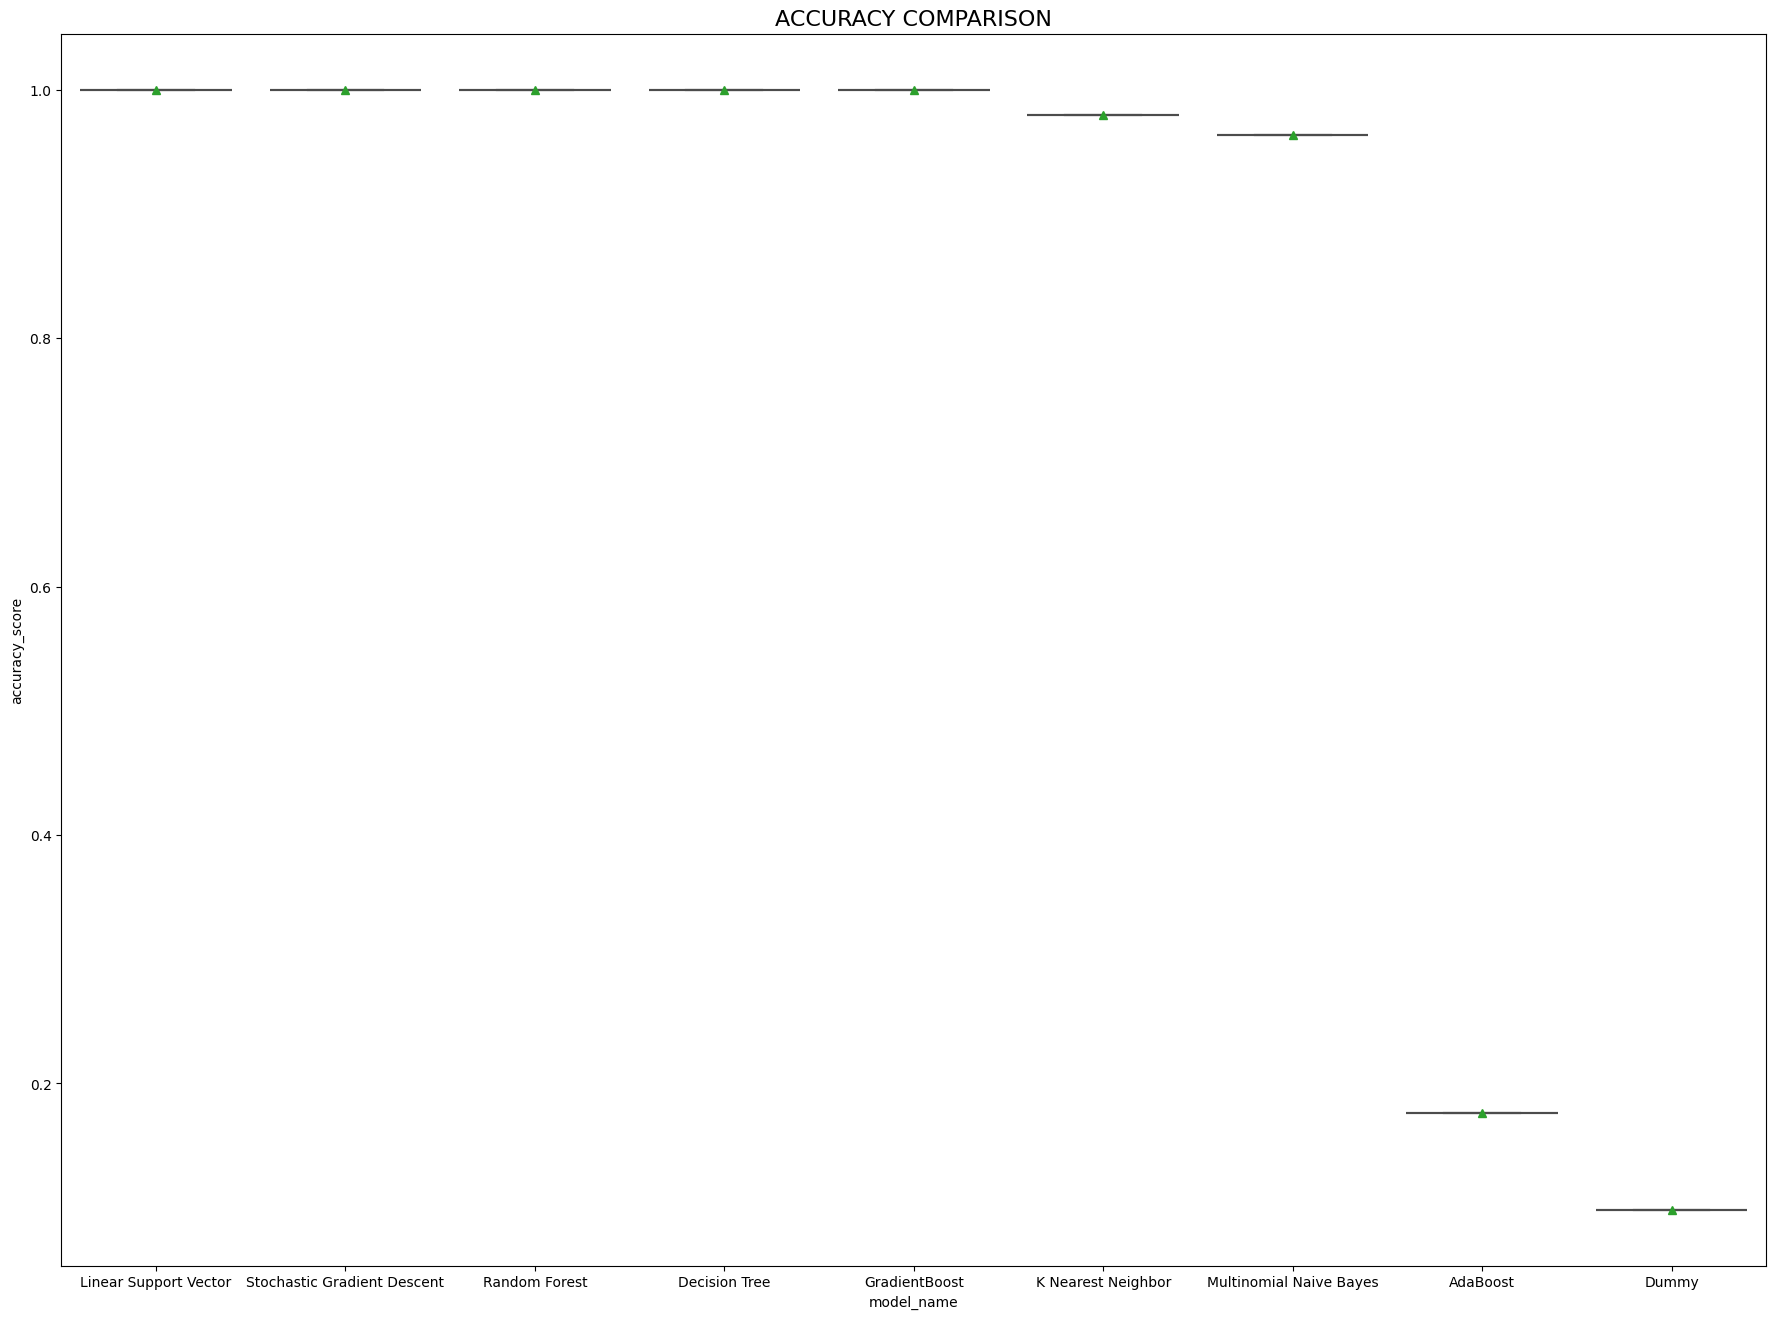

In [76]:
plt.figure(figsize=(22,16))
sns.boxplot(x='model_name', y='accuracy_score', 
            data=model_score_data(model_dict), 
            color='orange', 
            showmeans=True)
plt.title("ACCURACY COMPARISON", size=16);

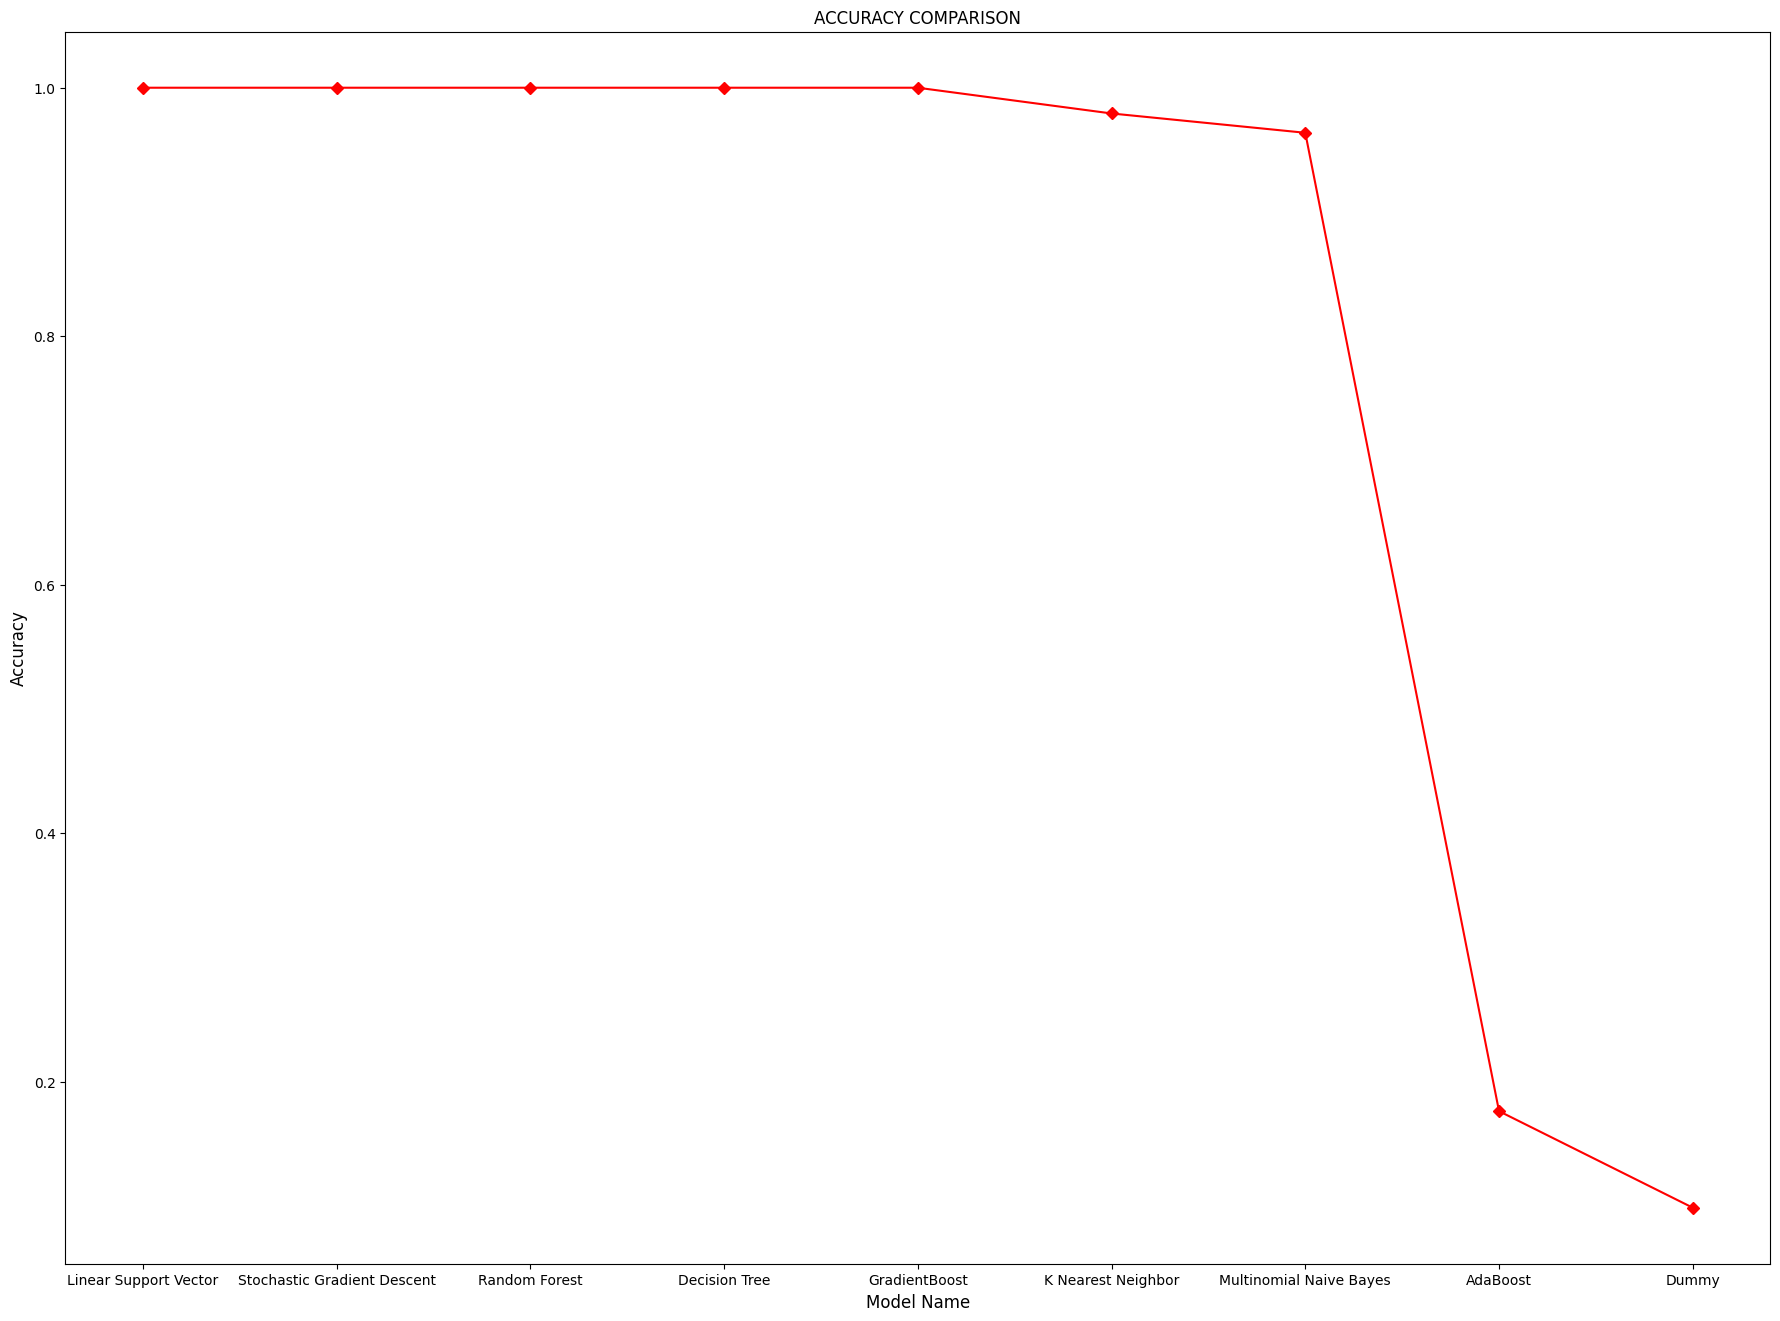

In [77]:
plt.figure(figsize=(22,16))
x = model_score_data(model_dict).model_name
y = model_score_data(model_dict).accuracy_score
plt.xlabel("Model Name",size=12)
plt.ylabel("Accuracy",size=12)
plt.title("ACCURACY COMPARISON")
plt.plot(x,y, marker = 'D',color = 'r')
plt.show()

# EVALUATING DIFFERENT MODELS - RESULT VISUALIZATION

## K-NEAREST NEIGHBORS CLASSIFIER

In [42]:
from sklearnex import patch_sklearn, unpatch_sklearn

In [44]:
patch_sklearn()
model = KNeighborsClassifier()
model.fit(x_train, y_train)
prediction = model.predict(x_test)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [45]:
print("Training Set Accuracy [KNN] : ", model.score(x_train, y_train))
print("Test Set Accuracy [KNN] : ", model.score(x_test, y_test))
print("\nClassification Report\n", classification_report(y_test, prediction, target_names=Labels))

Training Set Accuracy [KNN] :  0.9934980494148244
Test Set Accuracy [KNN] :  0.9792746113989638

Classification Report
                            precision    recall  f1-score   support

             Data Science       1.00      1.00      1.00         3
                       HR       1.00      1.00      1.00         3
                 Advocate       1.00      0.80      0.89         5
                     Arts       1.00      1.00      1.00         9
            Web Designing       1.00      1.00      1.00         6
      Mechanical Engineer       1.00      1.00      1.00         5
                    Sales       0.82      1.00      0.90         9
       Health and fitness       1.00      0.71      0.83         7
           Civil Engineer       1.00      0.91      0.95        11
           Java Developer       1.00      1.00      1.00         9
         Business Analyst       1.00      1.00      1.00         8
            SAP Developer       0.90      1.00      0.95         9
       A

In [46]:
# Predicting the Class (Result)
def profilePredict(resume):
    profile = list(le.classes_)
    r = vect.transform(resume)
    num = model.predict(r)[0]
    return profile[num]

In [47]:
resume = ["Research enthusiast in advance multirotor and fixed wing autonomous algorithms, machine learning, and deep learning. Skilled in Python, and everyday pushing to learn more."]

profilePredict(resume)


'Data Science'

Text(0.5, 190.7222222222222, 'Predicted Values')

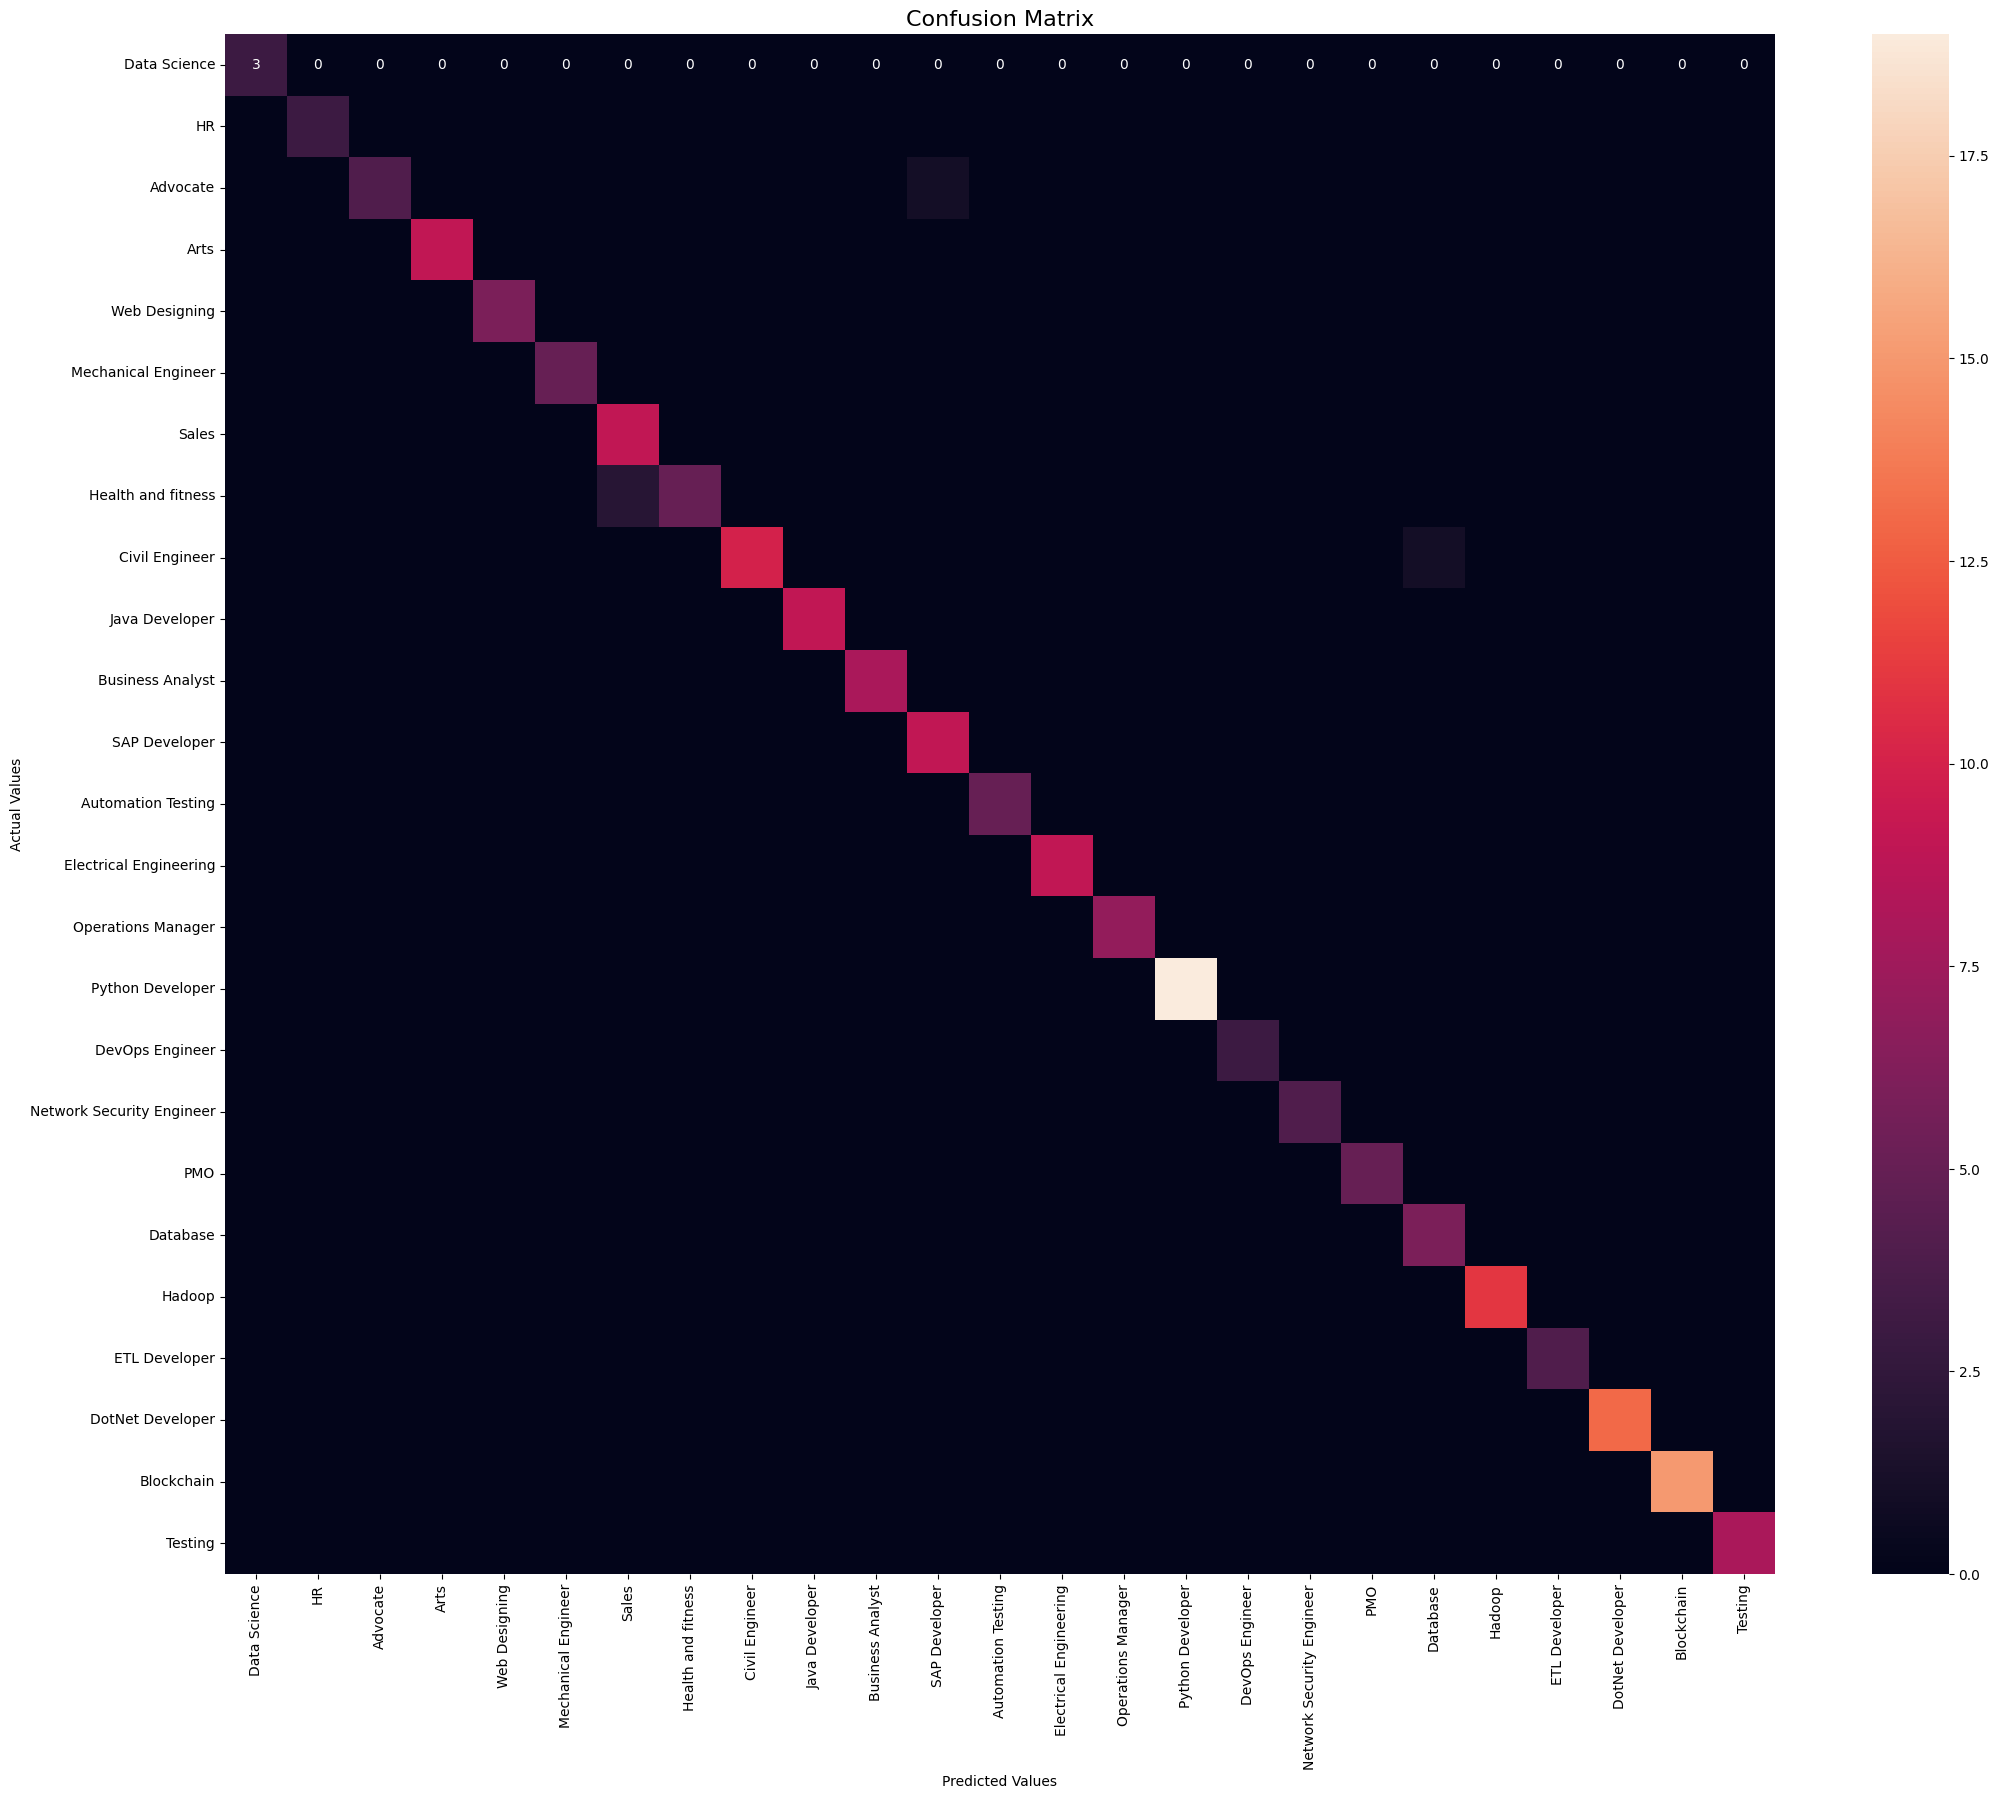

In [48]:
#Plotting the confusion matrix
conf = confusion_matrix(y_test, prediction)

plt.figure(figsize=(25,20))
sns.heatmap(conf, annot=True,
            xticklabels=category_unique.Category.values, 
            yticklabels=category_unique.Category.values)

plt.title('Confusion Matrix', size =16)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

#### VISUALIZING THE RESULTS BY PLOTTING OPTIMAL K-VALUE AGAINST ERROR RATE

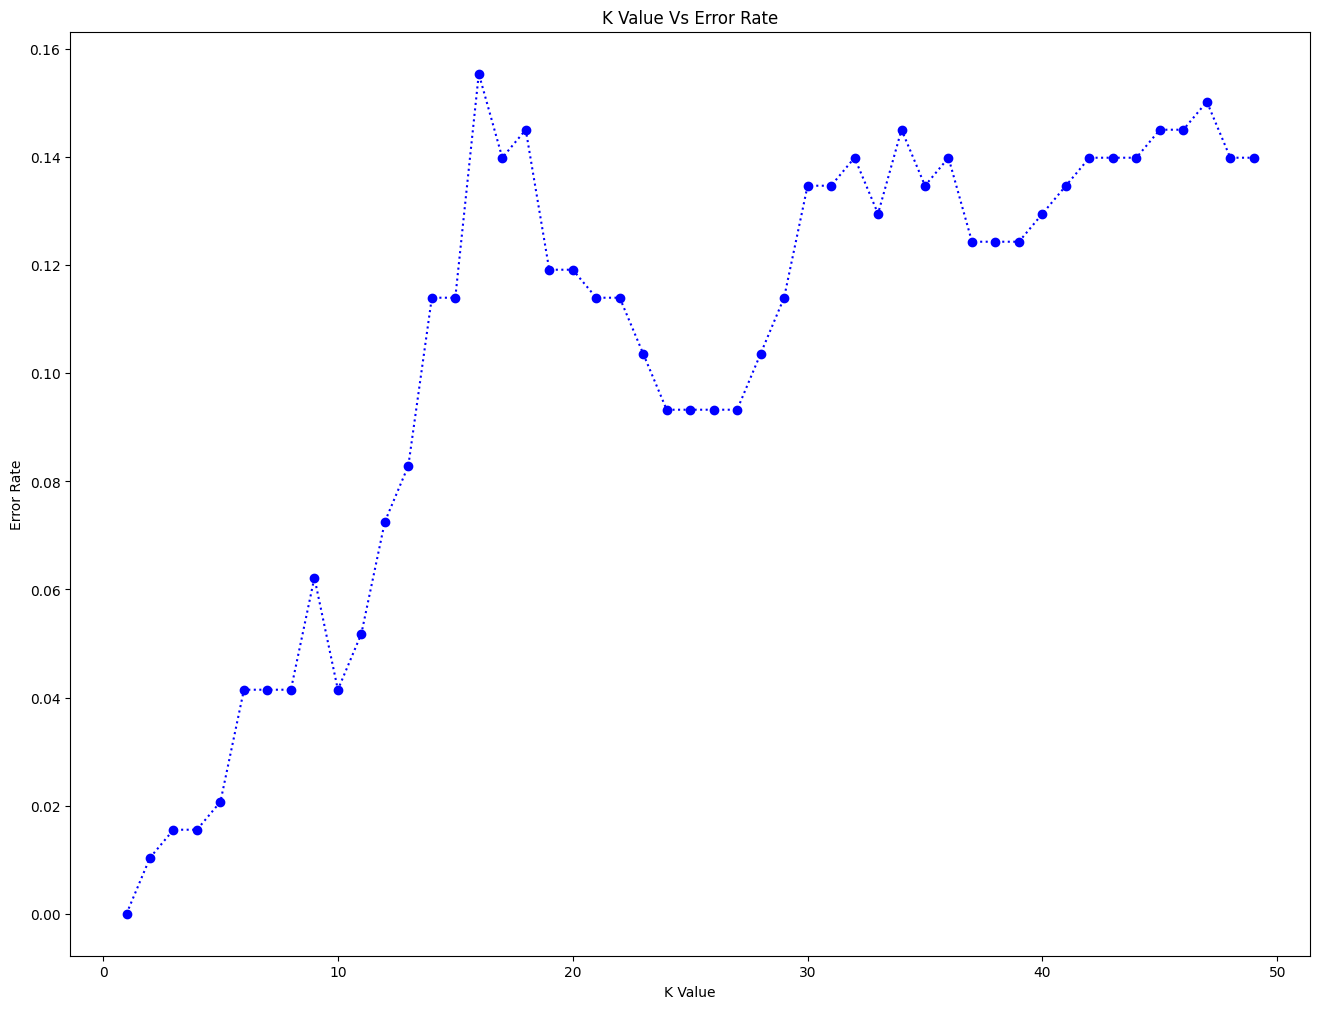

In [50]:
 error_rate=[]
 for i in range(1,50):
             knn = KNeighborsClassifier(n_neighbors=i)
             model = knn.fit(x_train,y_train)
             pred_i = knn.predict(x_test)
             error_rate.append(np.mean(pred_i != y_test))
 plt.figure(figsize=(16,12))
 plt.plot(range(1,50), error_rate, linestyle = 'dotted', marker = 'o',color = 'b')
 plt.xlabel('K Value')
 plt.ylabel('Error Rate')
 plt.title('K Value Vs Error Rate')
 plt.show() 

## MULTINOMIAL NAIVE BAYES ALGORITHM

In [51]:
patch_sklearn()
clf = MultinomialNB()
clf.fit(x_train, y_train)
pred_MNB = clf.predict(x_test)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [52]:
print("Training Set Accuracy [MNB] : ", clf.score(x_train, y_train))
print("Test Set Accuracy [MNB] : ", clf.score(x_test, y_test))
print("\nClassification Report\n", classification_report(y_test, pred_MNB, target_names=Labels))

Training Set Accuracy [MNB] :  0.9804941482444733
Test Set Accuracy [MNB] :  0.9637305699481865

Classification Report
                            precision    recall  f1-score   support

             Data Science       1.00      0.67      0.80         3
                       HR       0.75      1.00      0.86         3
                 Advocate       1.00      0.80      0.89         5
                     Arts       1.00      1.00      1.00         9
            Web Designing       1.00      0.83      0.91         6
      Mechanical Engineer       1.00      1.00      1.00         5
                    Sales       0.82      1.00      0.90         9
       Health and fitness       1.00      0.71      0.83         7
           Civil Engineer       1.00      0.91      0.95        11
           Java Developer       1.00      0.89      0.94         9
         Business Analyst       1.00      1.00      1.00         8
            SAP Developer       1.00      1.00      1.00         9
       A

In [53]:
def profilePredict(resume):
    profile = list(le.classes_)
    r = vect.transform(resume)
    num = clf.predict(r)[0]
    return profile[num]

resume = ["Research enthusiast in advance multirotor and fixed wing autonomous algorithms, machine learning, and deep learning. Skilled in Python, and everyday pushing to learn more."]
profilePredict(resume)

'Data Science'

Text(0.5, 190.7222222222222, 'Predicted Values')

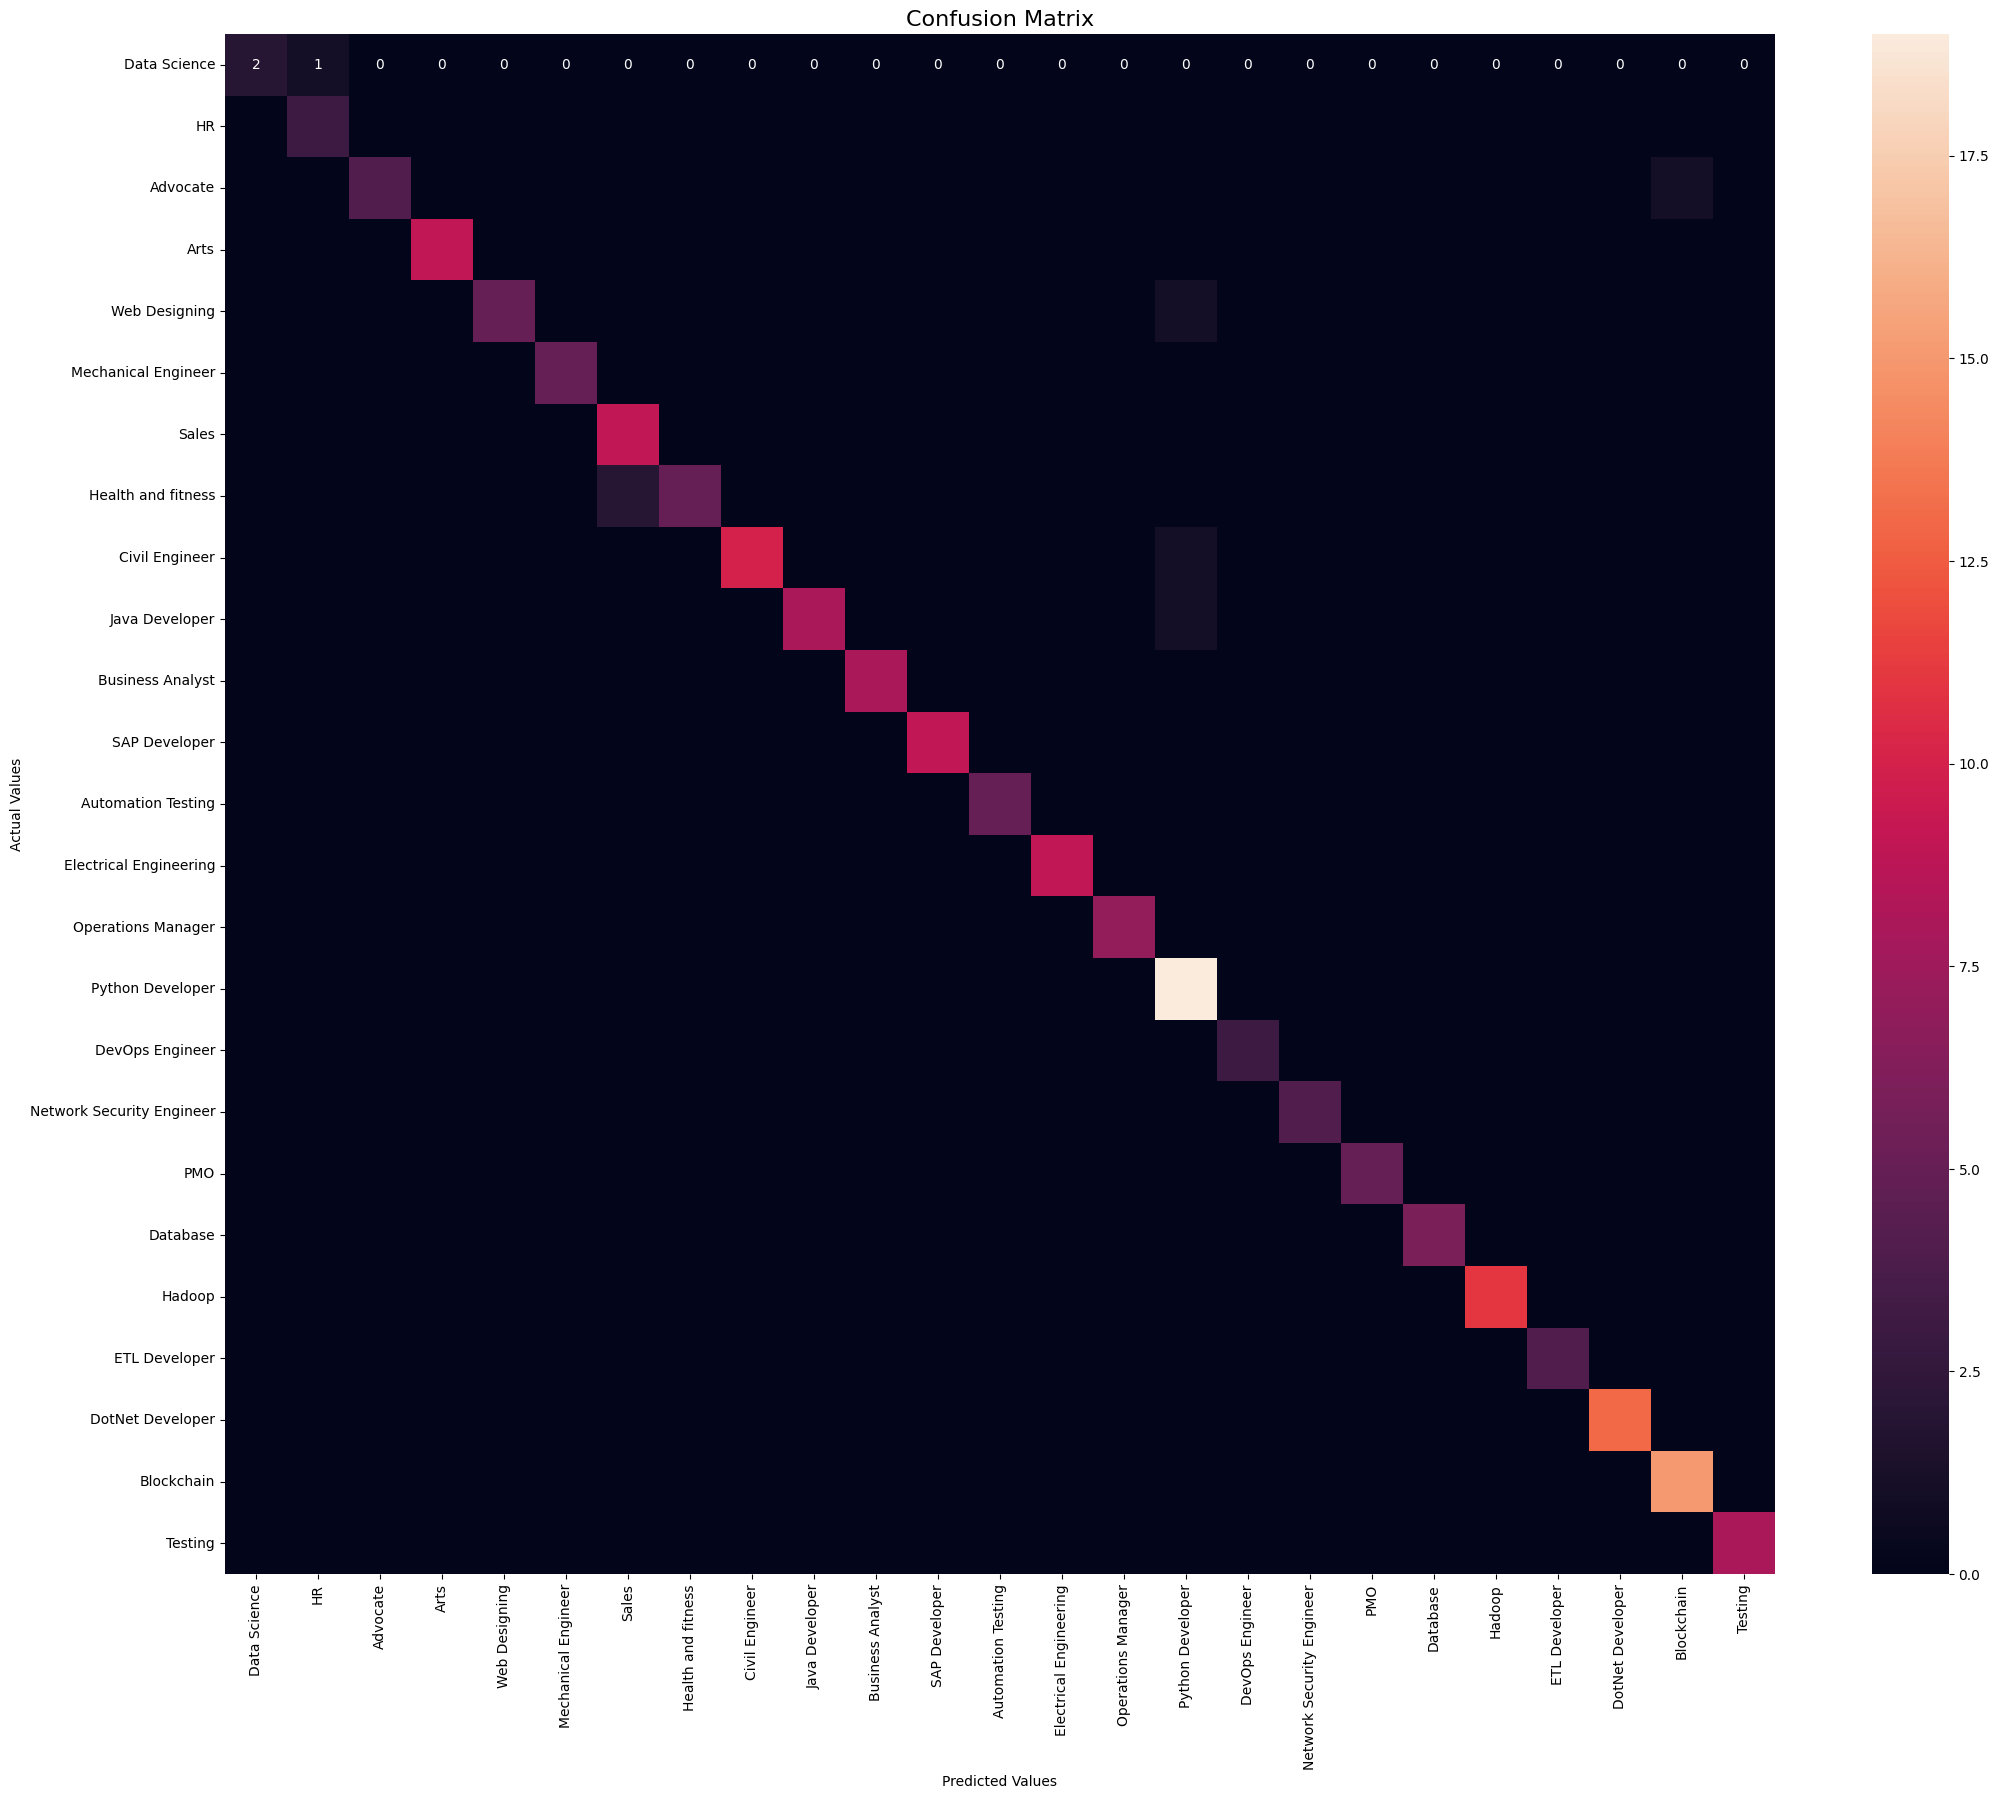

In [54]:
#Plotting the confusion matrix
conf = confusion_matrix(y_test, pred_MNB)

plt.figure(figsize=(25,20))
sns.heatmap(conf, annot=True,
            xticklabels=category_unique.Category.values, 
            yticklabels=category_unique.Category.values)

plt.title('Confusion Matrix', size =16)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

## DECISION TREE CLASSIFIER ALGORITHM

In [56]:
patch_sklearn()
new_model = DecisionTreeClassifier()
new_model.fit(x_train, y_train)
pred_DTC = new_model.predict(x_test)
print("Training Set metrics Accuracy [Random Forest] : ", new_model.score(x_train, y_train))
print("Test Set Accuracy [Random Forest] : ", new_model.score(x_test, y_test))
print("\nClassification Report\n", classification_report(y_test, pred_DTC, target_names=Labels))

Training Set metrics Accuracy [Random Forest] :  1.0
Test Set Accuracy [Random Forest] :  1.0

Classification Report
                            precision    recall  f1-score   support

             Data Science       1.00      1.00      1.00         3
                       HR       1.00      1.00      1.00         3
                 Advocate       1.00      1.00      1.00         5
                     Arts       1.00      1.00      1.00         9
            Web Designing       1.00      1.00      1.00         6
      Mechanical Engineer       1.00      1.00      1.00         5
                    Sales       1.00      1.00      1.00         9
       Health and fitness       1.00      1.00      1.00         7
           Civil Engineer       1.00      1.00      1.00        11
           Java Developer       1.00      1.00      1.00         9
         Business Analyst       1.00      1.00      1.00         8
            SAP Developer       1.00      1.00      1.00         9
       Aut

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [57]:
def profilePredict(resume):
    profile = list(le.classes_)
    r = vect.transform(resume)
    num = new_model.predict(r)[0]
    return profile[num]

resume = ["Love to invest in various crypto currencies and have knack of various programming languages required for blockchain development"]
profilePredict(resume)

'Blockchain'

Text(0.5, 190.7222222222222, 'Predicted Values')

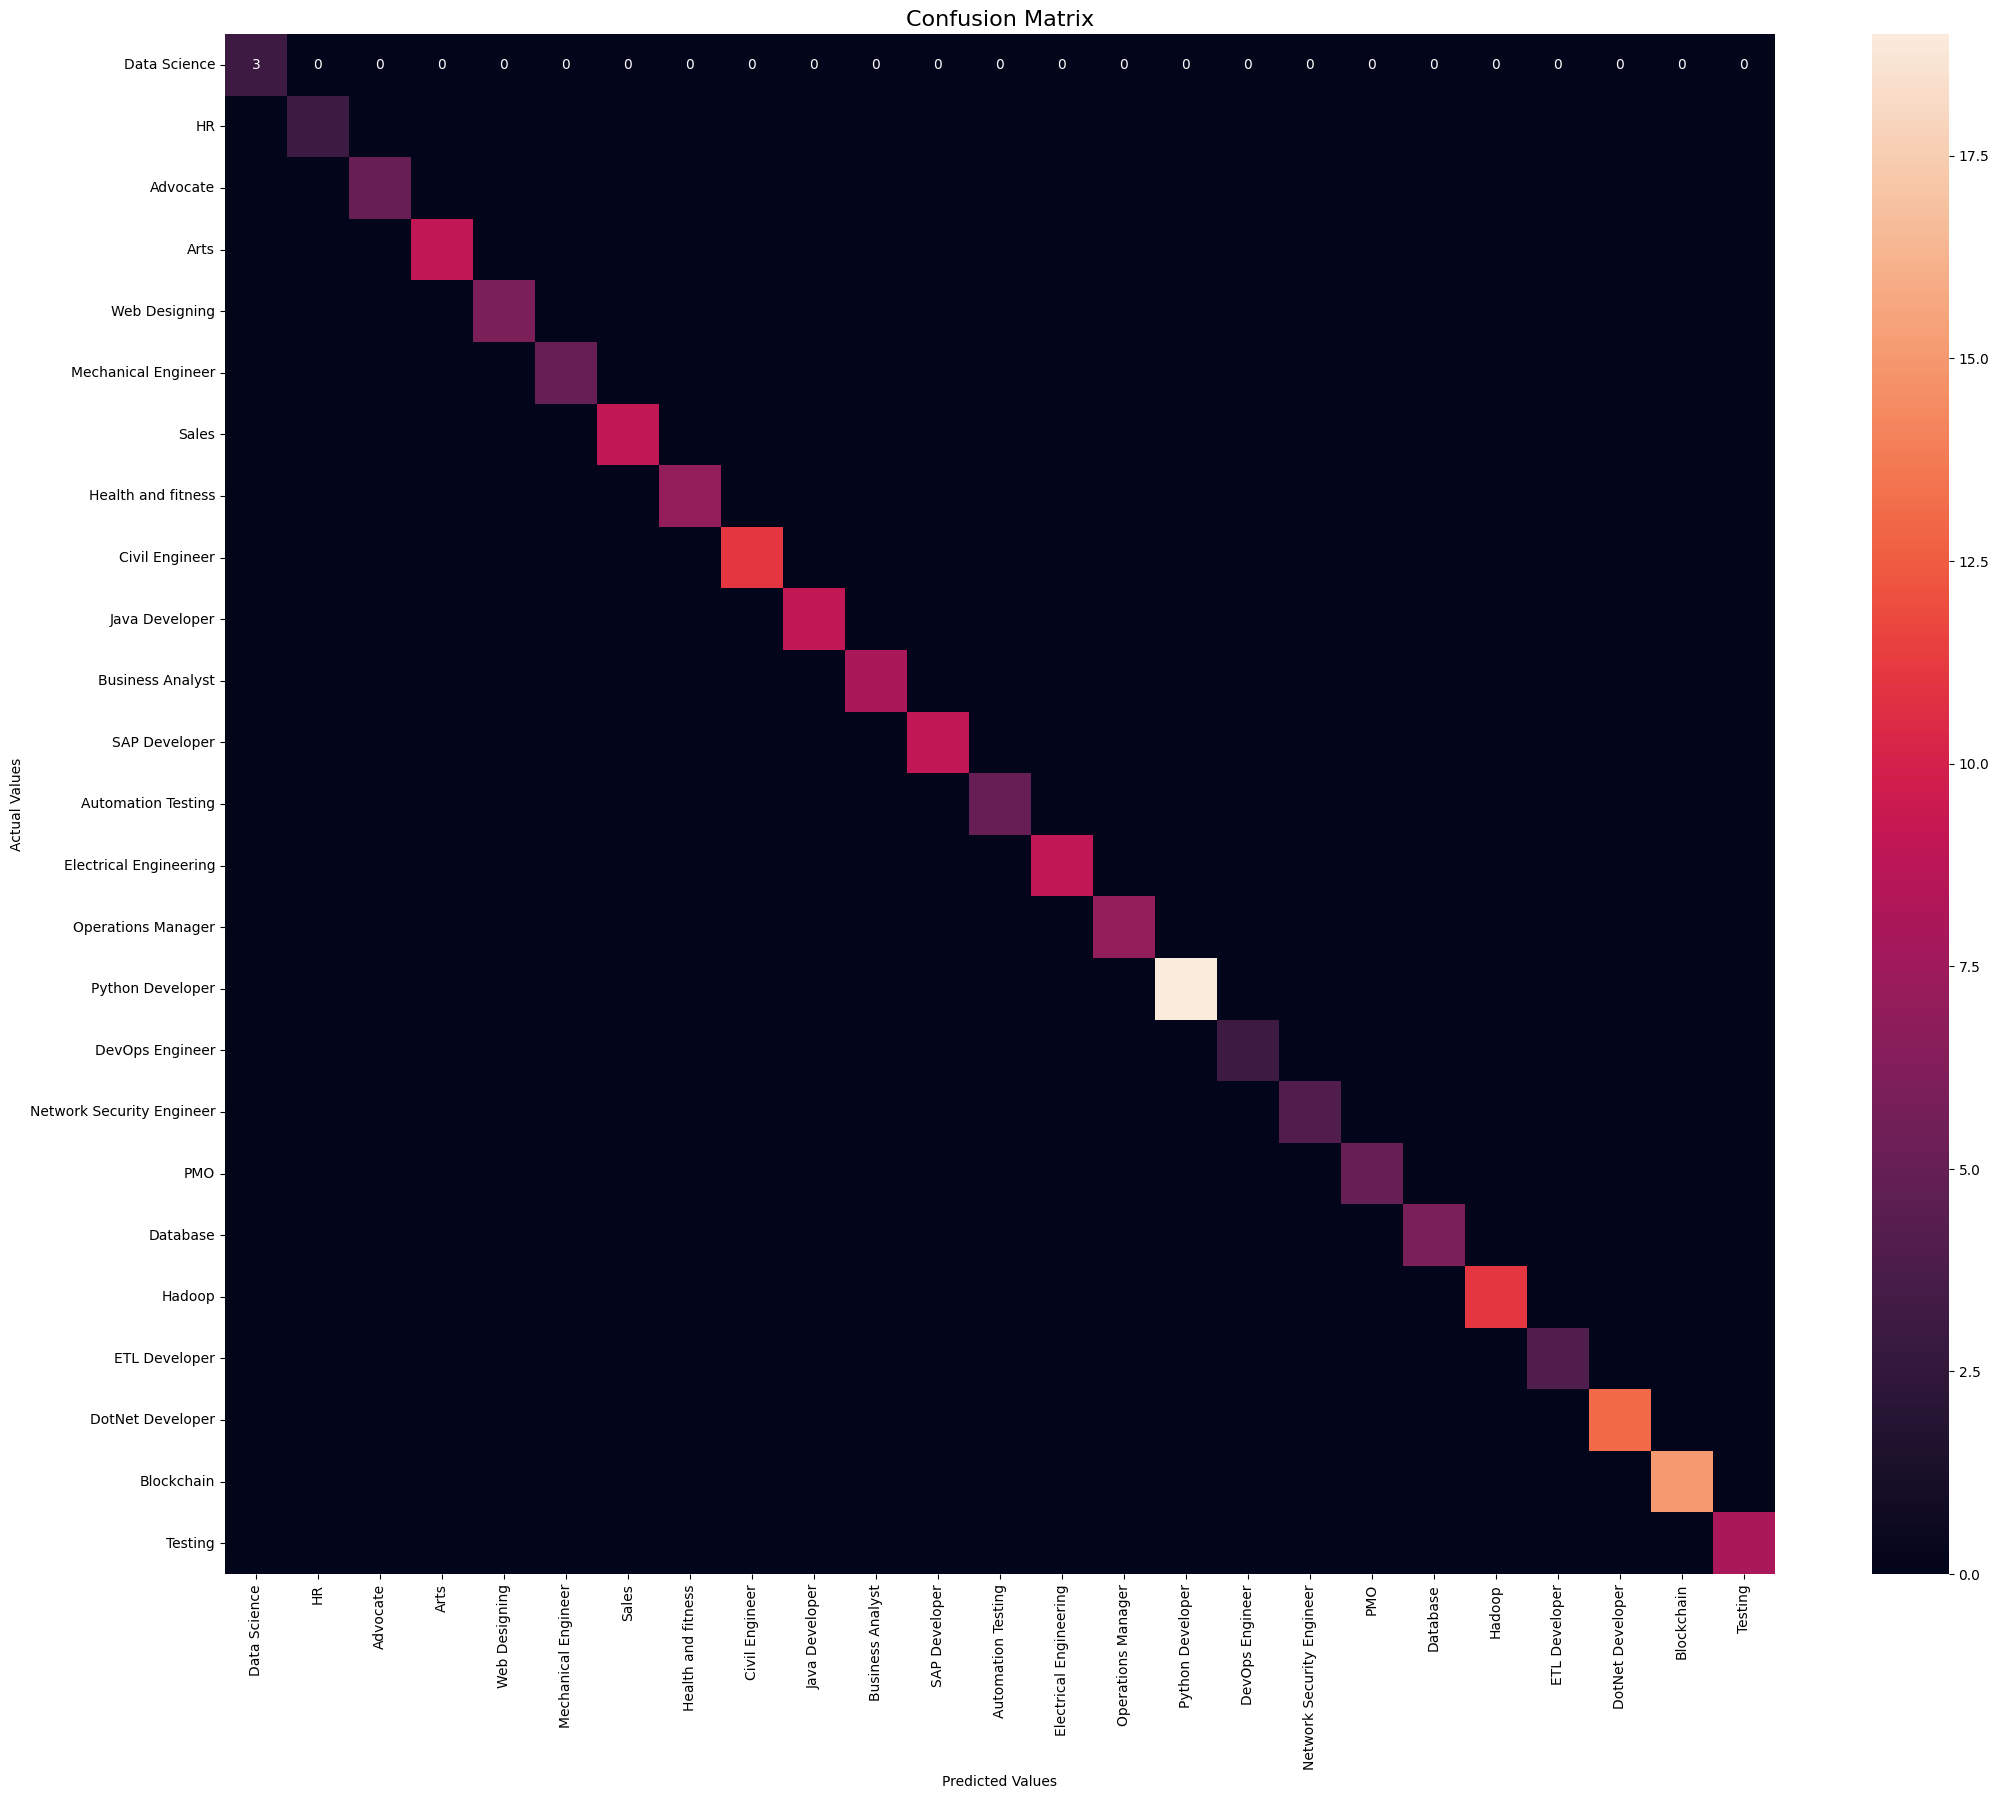

In [58]:
#Plotting the confusion matrix
conf = confusion_matrix(y_test, pred_DTC)

plt.figure(figsize=(25,20))
sns.heatmap(conf, annot=True,
            xticklabels=category_unique.Category.values, 
            yticklabels=category_unique.Category.values)

plt.title('Confusion Matrix', size =16)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

## STOCHASTIC GRADIENT DESCENT

In [59]:
patch_sklearn()
sgd = Pipeline([('tfidf', TfidfTransformer()), 
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None))])

sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_test)


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [60]:
print("Training Set metrics Accuracy [LSVM] : ", sgd.score(x_train, y_train))
print("Test Set Accuracy [LSVM] : ", sgd.score(x_test, y_test))
print("\nClassification Report\n", classification_report(y_test, pred_sgd, target_names=Labels))

Training Set metrics Accuracy [LSVM] :  1.0
Test Set Accuracy [LSVM] :  1.0

Classification Report
                            precision    recall  f1-score   support

             Data Science       1.00      1.00      1.00         3
                       HR       1.00      1.00      1.00         3
                 Advocate       1.00      1.00      1.00         5
                     Arts       1.00      1.00      1.00         9
            Web Designing       1.00      1.00      1.00         6
      Mechanical Engineer       1.00      1.00      1.00         5
                    Sales       1.00      1.00      1.00         9
       Health and fitness       1.00      1.00      1.00         7
           Civil Engineer       1.00      1.00      1.00        11
           Java Developer       1.00      1.00      1.00         9
         Business Analyst       1.00      1.00      1.00         8
            SAP Developer       1.00      1.00      1.00         9
       Automation Testing   

In [61]:
def profilePredict(resume):
    profile = list(le.classes_)
    r = vect.transform(resume)
    num = sgd.predict(r)[0]
    return profile[num]

resume = ["Love to invest in various crypto currencies and have knack of various programming languages required for blockchain development"]
profilePredict(resume)

'Blockchain'

Text(0.5, 190.7222222222222, 'Predicted Values')

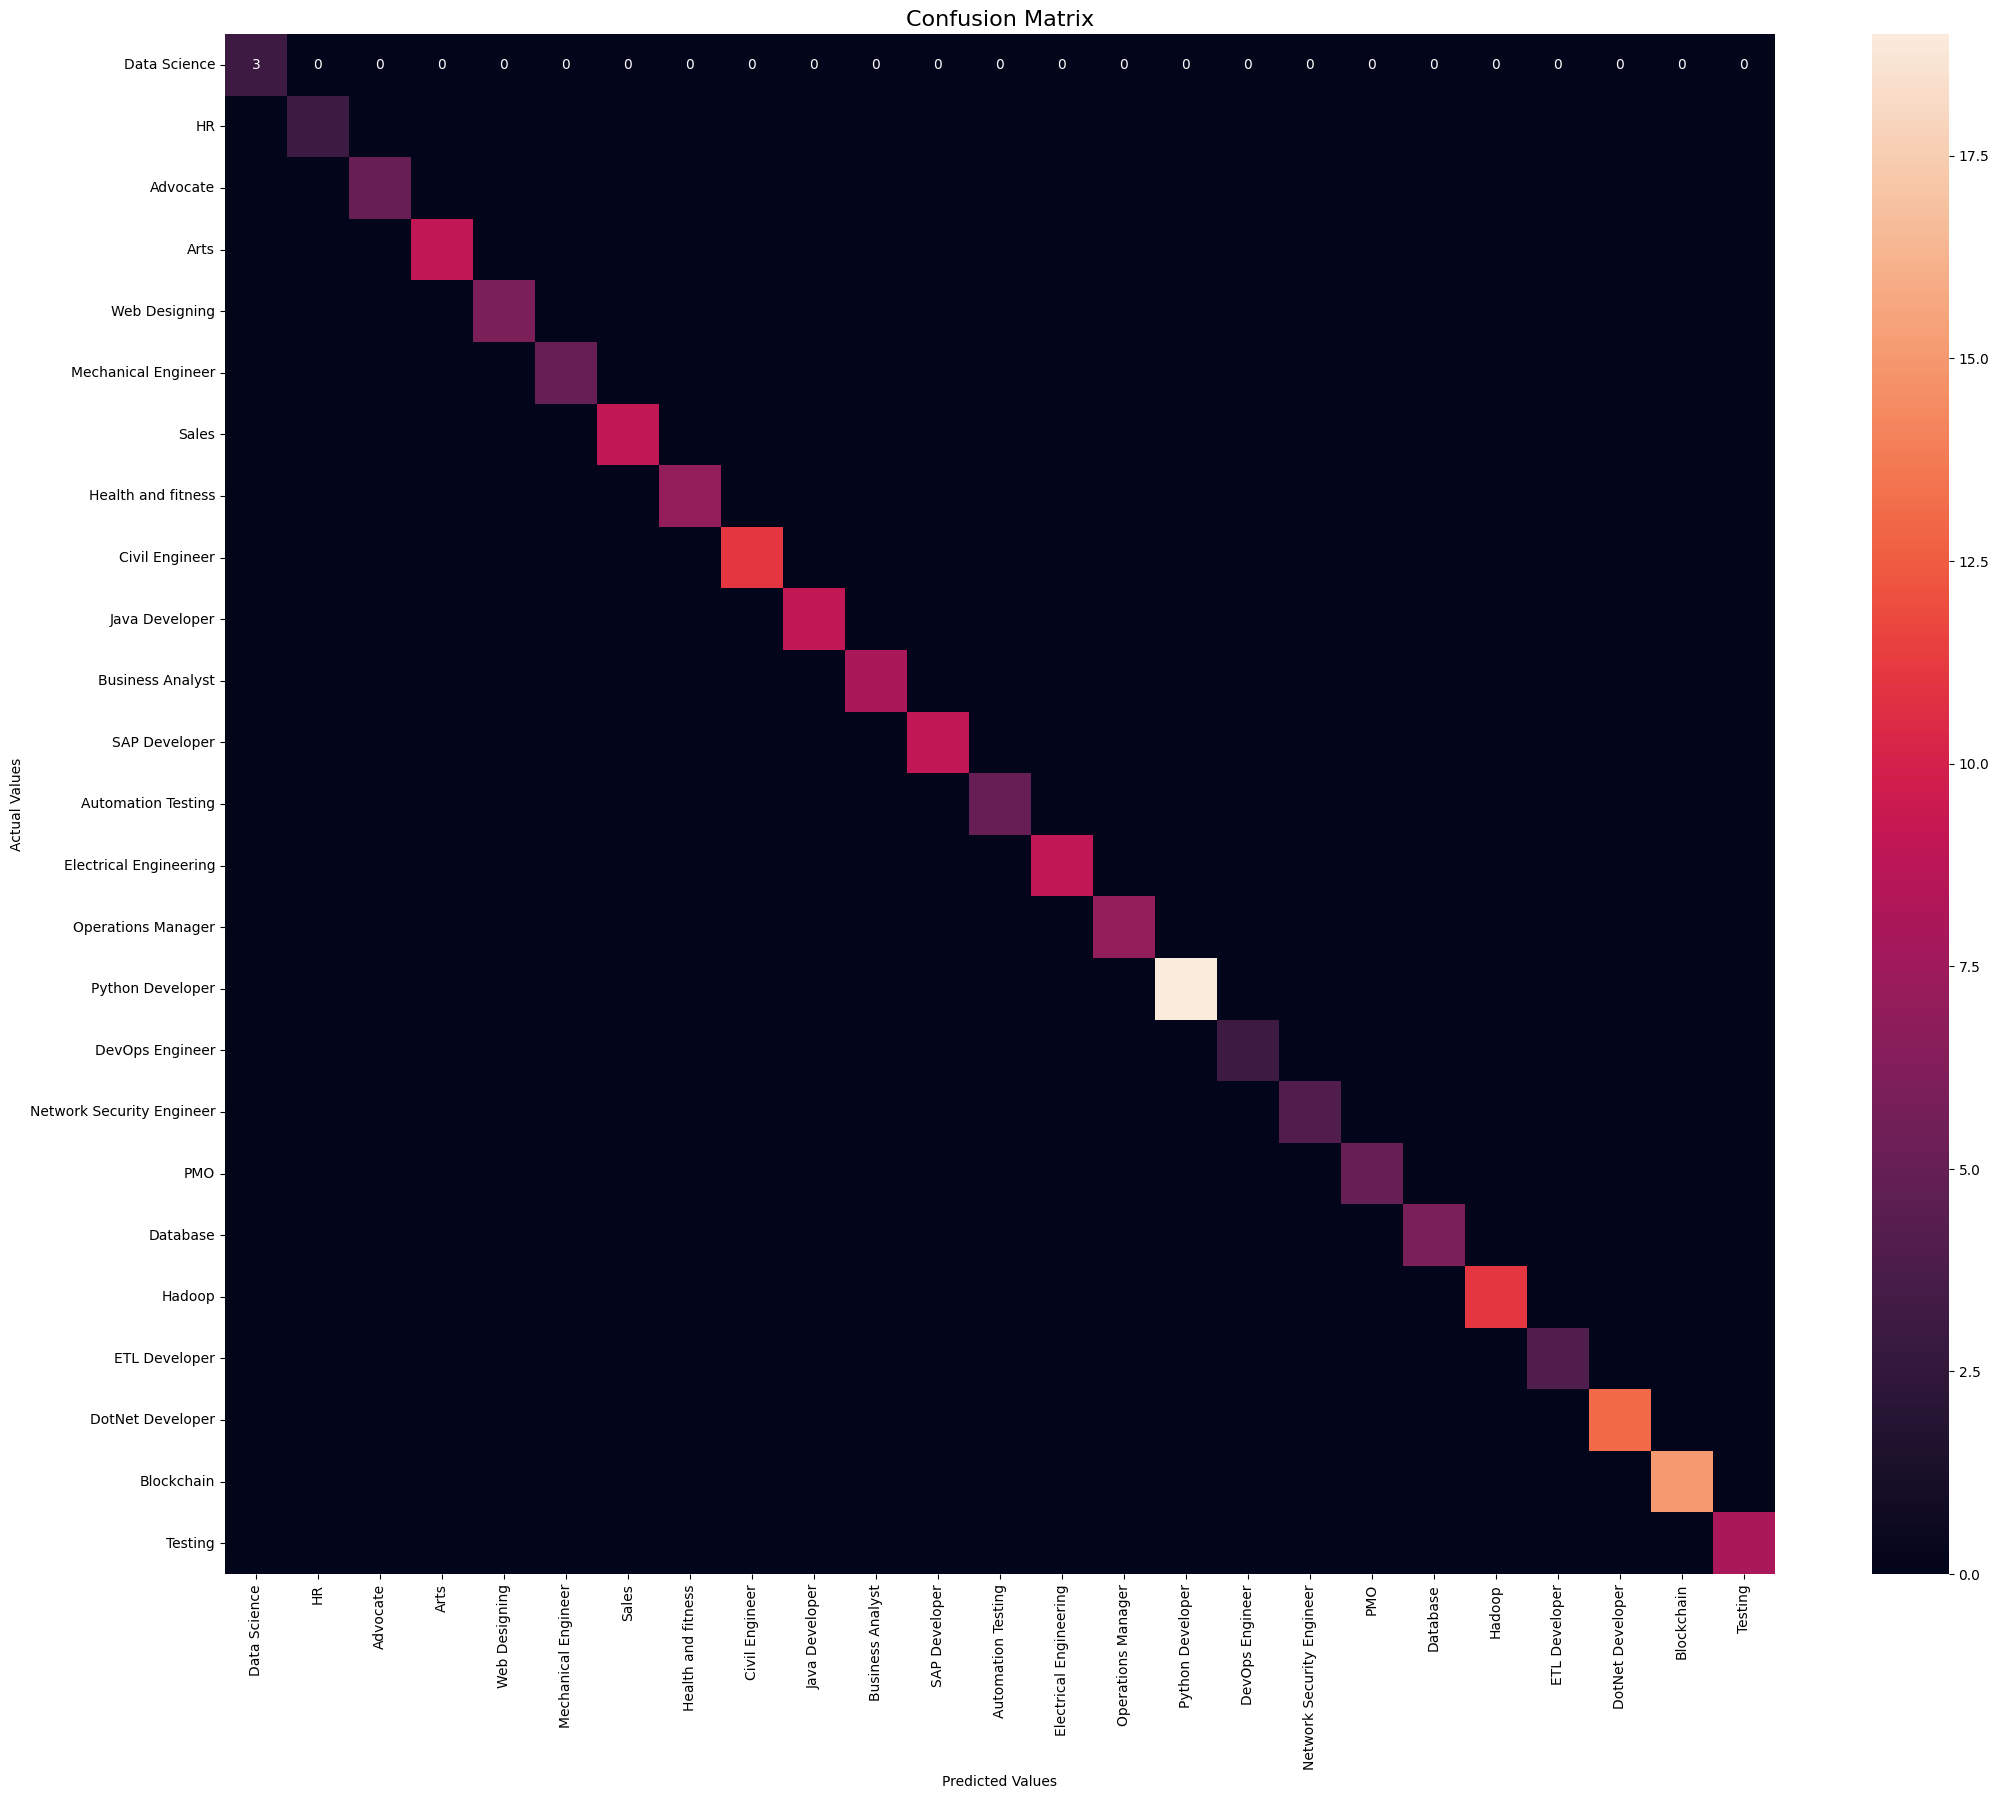

In [62]:
#Plotting the confusion matrix
conf = confusion_matrix(y_test, pred_sgd)

plt.figure(figsize=(25,20))
sns.heatmap(conf, annot=True,
            xticklabels=category_unique.Category.values, 
            yticklabels=category_unique.Category.values)

plt.title('Confusion Matrix', size =16)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

## GRADIENT BOOSTING

In [63]:
patch_sklearn()
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [64]:
gradient_booster.fit(x_train,y_train)
pred_GB = gradient_booster.predict(x_test)
print("Training Set metrics Accuracy [GB] : ", gradient_booster.score(x_train, y_train))
print("Test Set Accuracy [GB] : ", gradient_booster.score(x_test, y_test))
print("\nClassification Report\n", classification_report(y_test, pred_GB, target_names=Labels))

Training Set metrics Accuracy [GB] :  1.0
Test Set Accuracy [GB] :  1.0

Classification Report
                            precision    recall  f1-score   support

             Data Science       1.00      1.00      1.00         3
                       HR       1.00      1.00      1.00         3
                 Advocate       1.00      1.00      1.00         5
                     Arts       1.00      1.00      1.00         9
            Web Designing       1.00      1.00      1.00         6
      Mechanical Engineer       1.00      1.00      1.00         5
                    Sales       1.00      1.00      1.00         9
       Health and fitness       1.00      1.00      1.00         7
           Civil Engineer       1.00      1.00      1.00        11
           Java Developer       1.00      1.00      1.00         9
         Business Analyst       1.00      1.00      1.00         8
            SAP Developer       1.00      1.00      1.00         9
       Automation Testing       

In [65]:
def profilePredict(resume):
    profile = list(le.classes_)
    r = vect.transform(resume)
    num = gradient_booster.predict(r)[0]
    return profile[num]

resume = ["Love to invest in various crypto currencies and have knack of various programming languages required for blockchain development"]
profilePredict(resume)

'Blockchain'

Text(0.5, 190.7222222222222, 'Predicted Values')

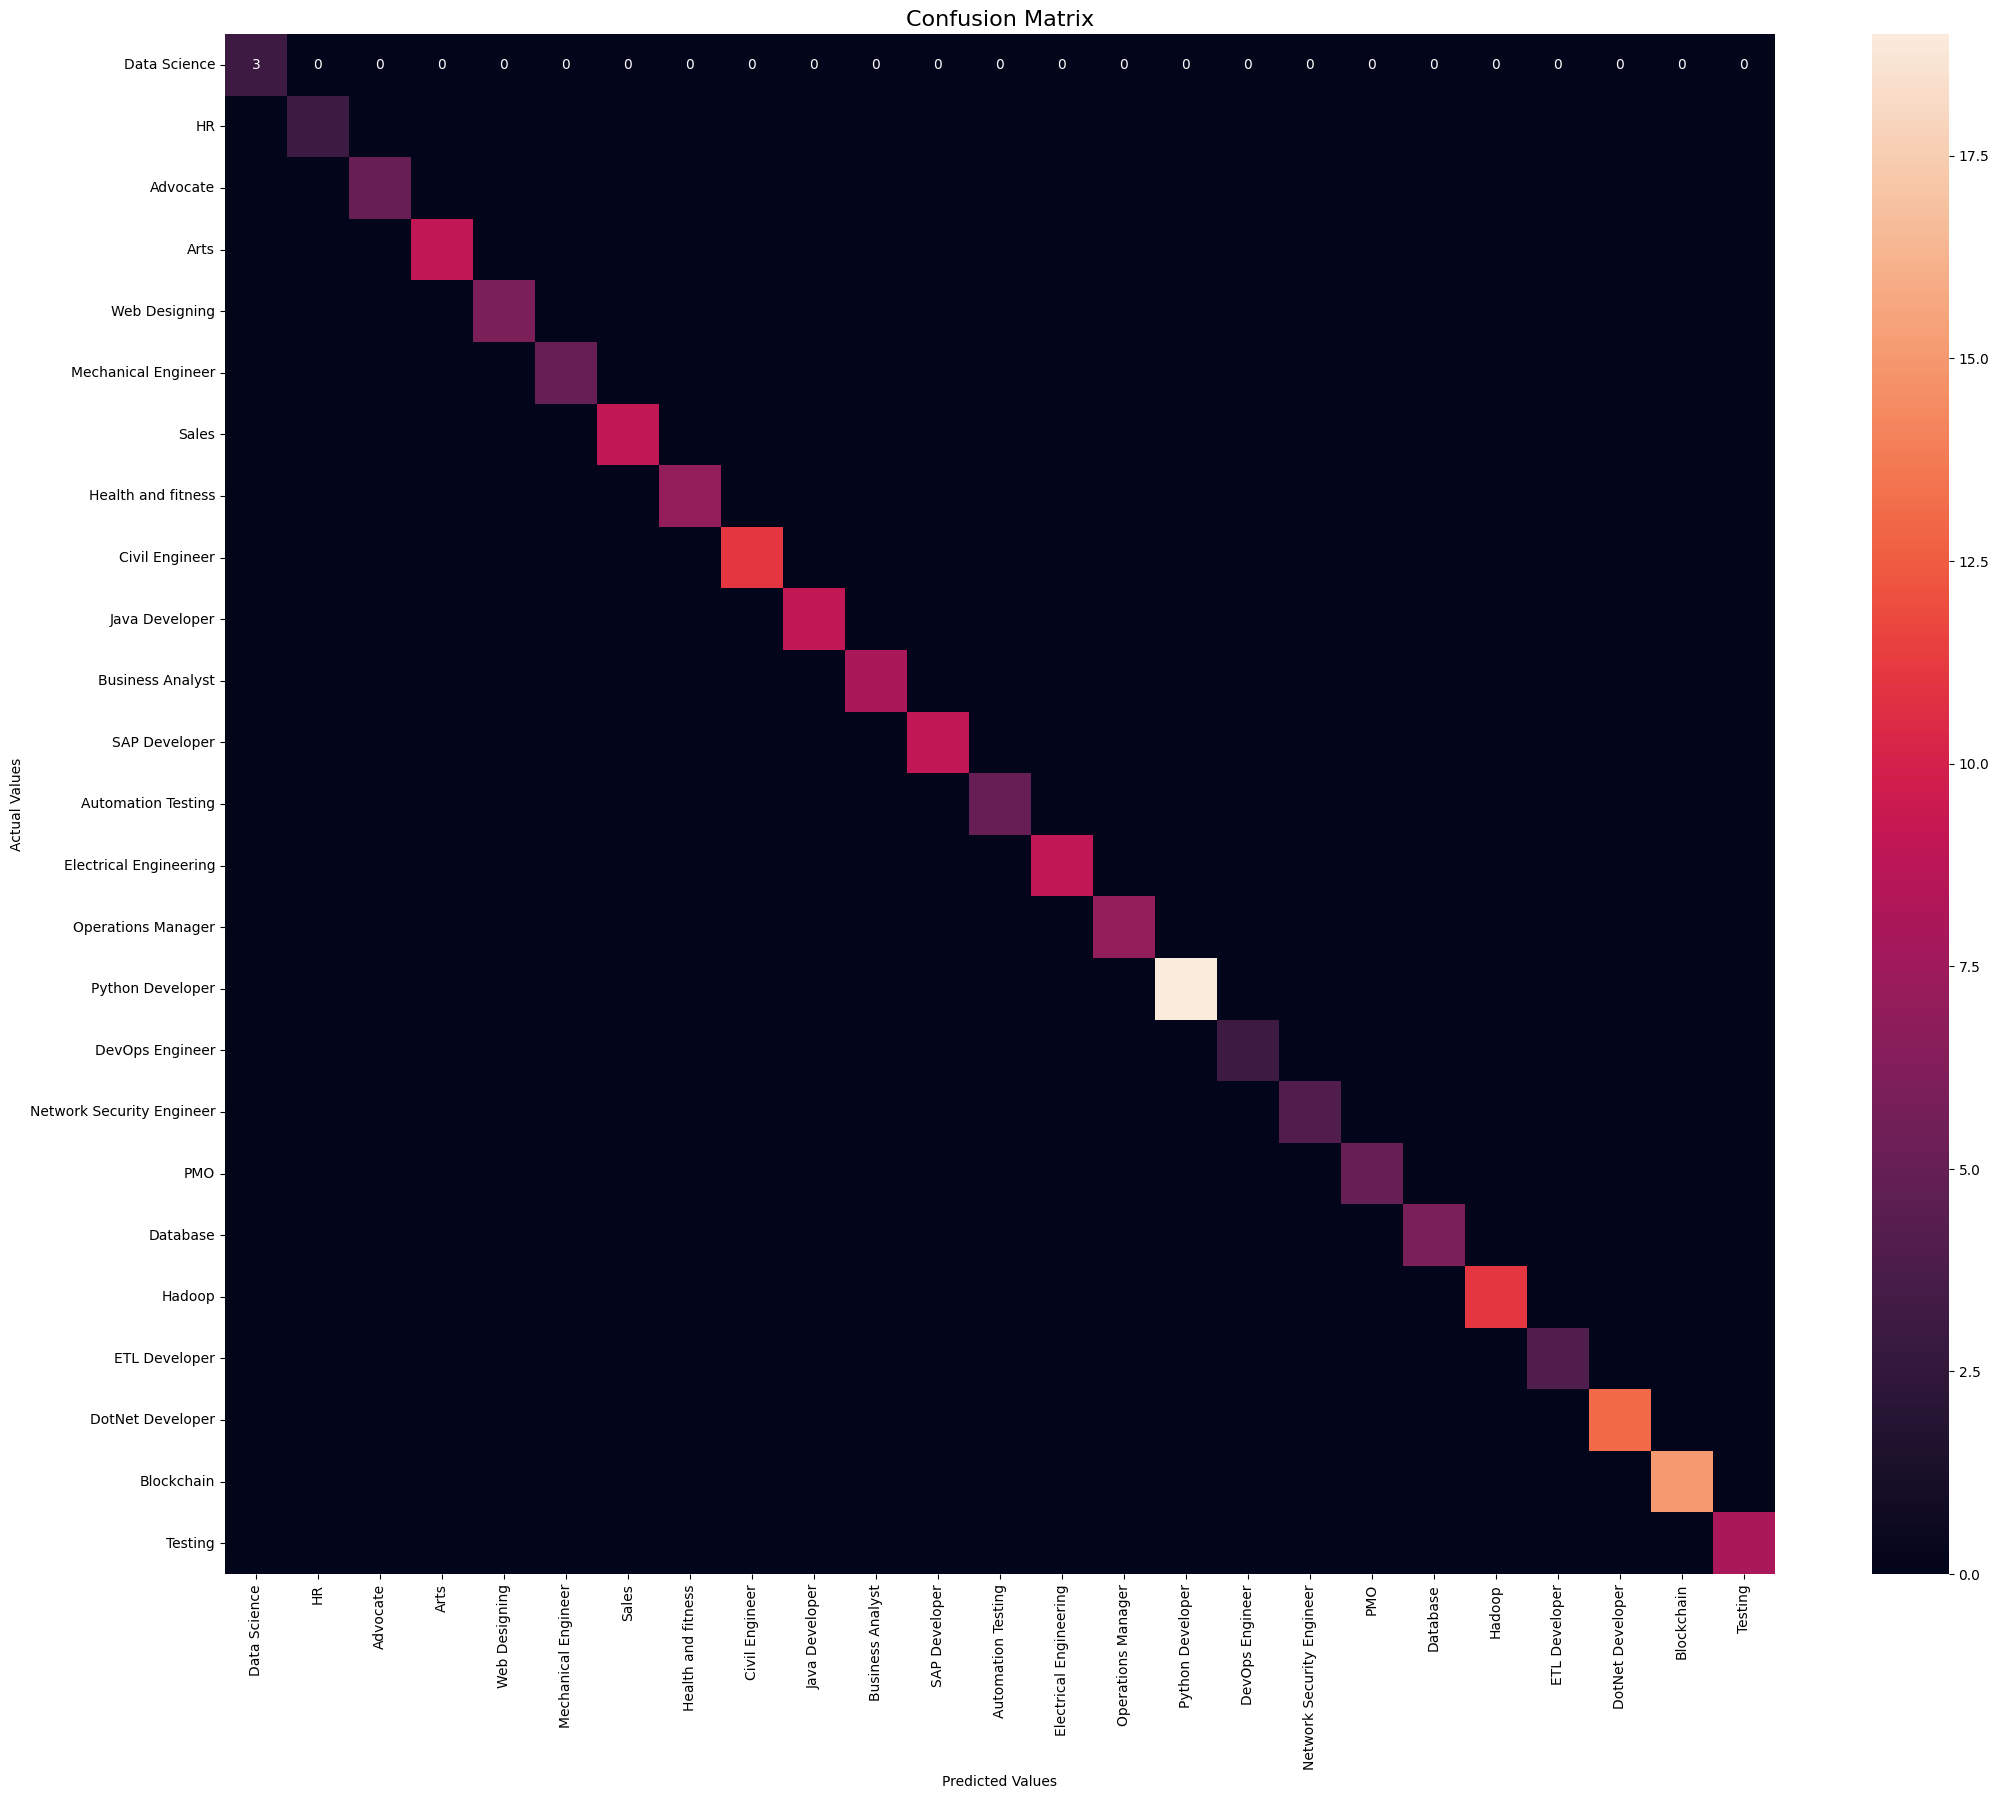

In [66]:
#Plotting the confusion matrix
conf = confusion_matrix(y_test, pred_GB)

plt.figure(figsize=(25,20))
sns.heatmap(conf, annot=True,
            xticklabels=category_unique.Category.values, 
            yticklabels=category_unique.Category.values)

plt.title('Confusion Matrix', size =16)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

## ADA_BOOST CLASSIFIER

In [71]:
patch_sklearn()
adb = AdaBoostClassifier()
adb.fit(x_train,y_train)
pred_ADB = gradient_booster.predict(x_test)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [68]:
print("Training Set metrics Accuracy [GB] : ", adb.score(x_train, y_train))
print("Test Set Accuracy [GB] : ", adb.score(x_test, y_test))
print("\nClassification Report\n", classification_report(y_test, pred_ADB, target_names=Labels))

Training Set metrics Accuracy [GB] :  0.15604681404421328
Test Set Accuracy [GB] :  0.17616580310880828

Classification Report
                            precision    recall  f1-score   support

             Data Science       1.00      1.00      1.00         3
                       HR       1.00      1.00      1.00         3
                 Advocate       1.00      1.00      1.00         5
                     Arts       1.00      1.00      1.00         9
            Web Designing       1.00      1.00      1.00         6
      Mechanical Engineer       1.00      1.00      1.00         5
                    Sales       1.00      1.00      1.00         9
       Health and fitness       1.00      1.00      1.00         7
           Civil Engineer       1.00      1.00      1.00        11
           Java Developer       1.00      1.00      1.00         9
         Business Analyst       1.00      1.00      1.00         8
            SAP Developer       1.00      1.00      1.00         9


In [69]:
def profilePredict(resume):
    profile = list(le.classes_)
    r = vect.transform(resume)
    num = adb.predict(r)[0]
    return profile[num]

resume = ["Love to invest in various crypto currencies and have knack of various programming languages required for blockchain development"]
profilePredict(resume)

'Testing'

Text(0.5, 190.7222222222222, 'Predicted Values')

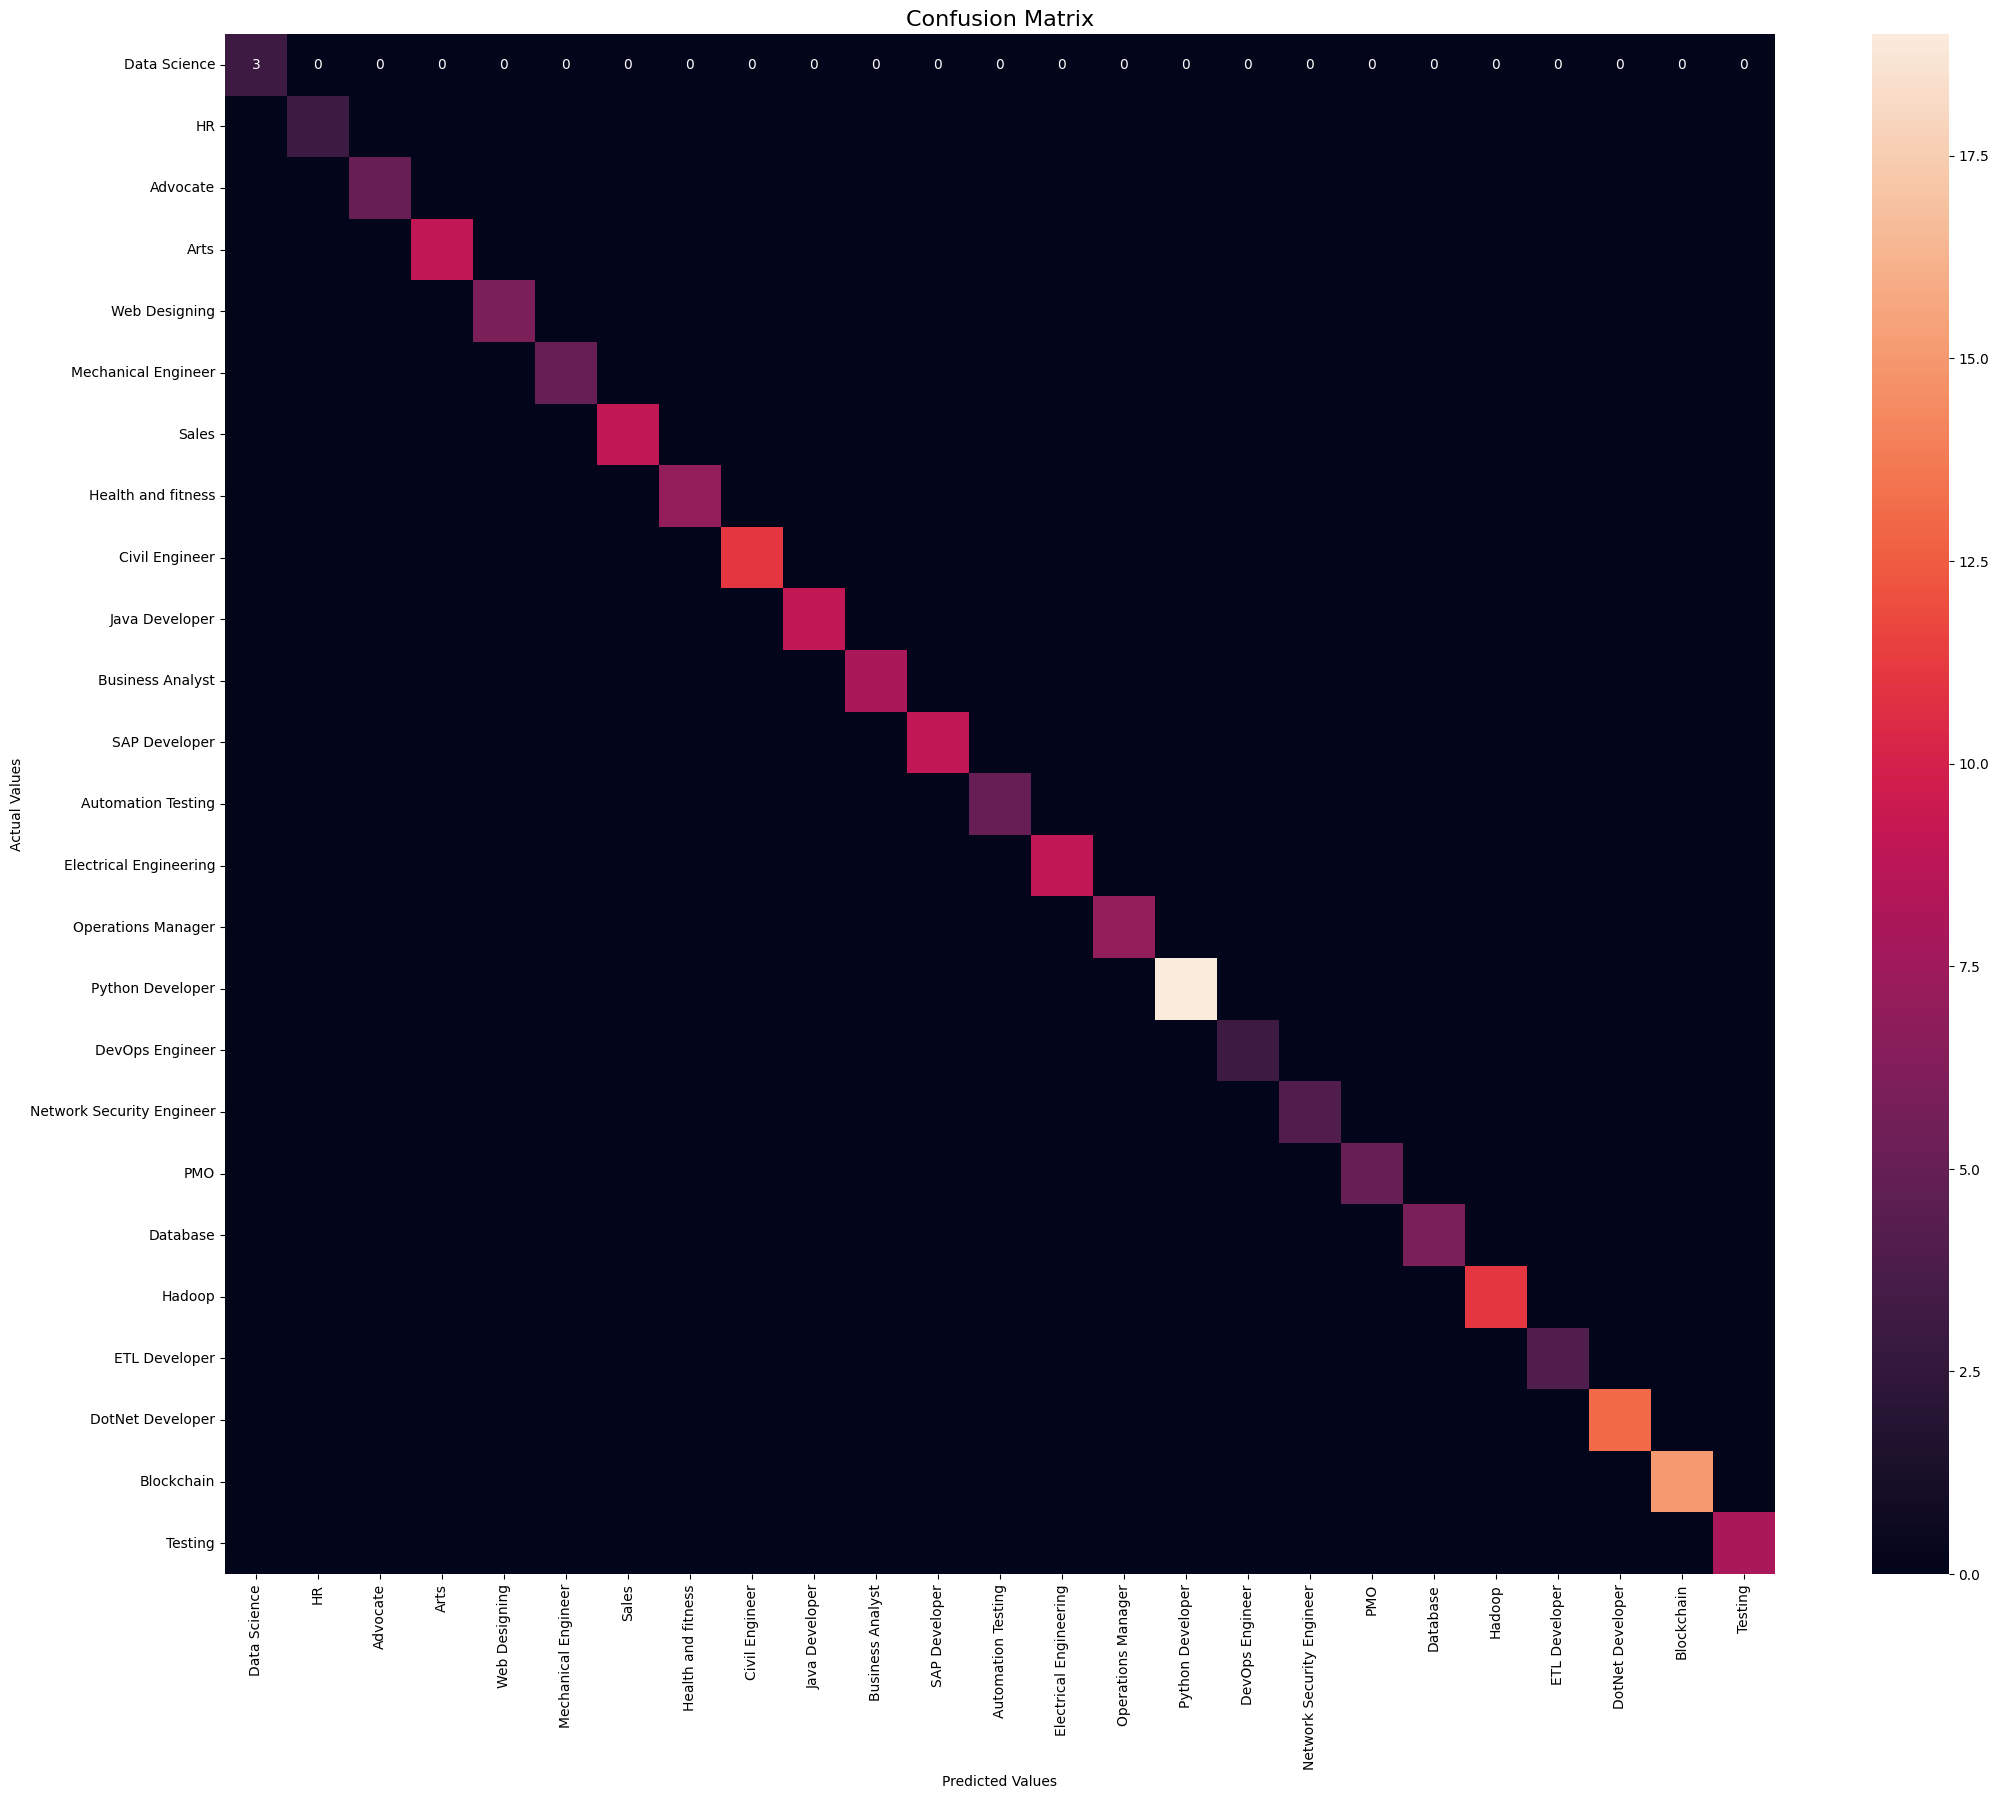

In [70]:
#Plotting the confusion matrix
conf = confusion_matrix(y_test, pred_ADB)

plt.figure(figsize=(25,20))
sns.heatmap(conf, annot=True,
            xticklabels=category_unique.Category.values, 
            yticklabels=category_unique.Category.values)

plt.title('Confusion Matrix', size =16)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')